## Bibliotecas e carregando os dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skt
import datetime as dt
import os
import folium

#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
#.preprocessing import Imputer
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.preprocessing import StandardScaler
#from sklearn.feature_selection import VarianceThreshold
#from sklearn.feature_selection import SelectFromModel
#from sklearn.utils import shuffle
#from sklearn.ensemble import RandomForestClassifier


pd.set_option('display.max_columns', 100)

month_num = str(4)
path_to_save = './Tempo-Clima/Analise_dados/'

if not os.path.exists(str(path_to_save+month_num)):
    os.makedirs(str(path_to_save+month_num))
    os.makedirs(str(path_to_save+month_num+'/recovery_data_analise/'))
data = pd.read_csv('./Tempo-Clima/Dados/EMA/Unidos_v2/Brasil_v2/Brasil_'+month_num+'_v4.csv')
#data = data.drop(columns=['Unnamed: 0.1','Unnamed: 0','Unnamed: 0.1.1','Unnamed: 0.1.1.1','Unnamed: 0.1.1.1.1'])

# Qual o tamanho da base?

In [2]:
data.shape

(3209232, 29)

# Retirando duplicações de dados e verificando o tamanho novamente

In [3]:
data.drop_duplicates()
data.shape

(3209232, 29)

# Informações da base

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3209232 entries, 0 to 3209231
Data columns (total 29 columns):
Altitude(metros)                              float64
Codigo OMM                                    float64
Day                                           int64
H(UTC)                                        int64
Latitude                                      float64
Longitude                                     float64
Month                                         int64
Nome                                          object
PRECIPITACAO (mm)                             float64
PRESSAO ATMOSFERICA (hPa)                     float64
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              float64
PRESSAO ATMOSFÉRICA MINIMA (hPa)              float64
RADIACAO GLOBAL (KJ/M2)                       float64
TEMPERATURA DO AR (C)                         float64
TEMPERATURA DO PONTO DE ORVALHO (C)           float64
TEMPERATURA MAXIMA (C)                        float64
TEMPERATURA MINIMA (C)        

In [5]:
data.describe().T

count          mean  \
Altitude(metros)                            3209232.0    344.196966   
Codigo OMM                                  3206592.0  85355.978557   
Day                                         3209232.0     15.526676   
H(UTC)                                      3209232.0     11.500000   
Latitude                                    3209232.0    -15.873661   
Longitude                                   3209232.0    -47.777388   
Month                                       3209232.0      4.000000   
PRECIPITACAO (mm)                           2811405.0      0.178391   
PRESSAO ATMOSFERICA (hPa)                   2925311.0    966.102776   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            2923924.0    966.373966   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            2923931.0    965.823286   
RADIACAO GLOBAL (KJ/M2)                     1471957.0   1366.730614   
TEMPERATURA DO AR (C)                       2937650.0     23.647031   
TEMPERATURA DO PONTO DE ORVALHO (C)         2896917.0     18.845019   
TEMPERATURA MAXIMA (C)                      2937475.0     24.266695   
TEMPERATURA MINIMA (C)                      2937503.0     23.065749   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  2897156.0     19.361688   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  2895386.0     18.351084   
UMIDADE RELATIVA DO AR (%)                  2899315.0     76.926852   
UMIDADE RELATIVA DO MAXIMA AR (%)           2898778.0     79.643116   
UMIDADE RELATIVA DO MINIMA AR (%)           2896690.0     74.073818   
VENTO VELOCIDADE                            2880013.0      1.757494   
VENTO, DIRECAO (graus)                      2858149.0    155.370307   
VENTO, RAJADA MAXIMA (m/s)                  2878306.0      4.294002   
Year                                        3209232.0   2011.573199   

                                                    std           min  \
Altitude(metros)                             287.482032      1.001000   
Codigo OMM                                  2260.460152  81609.000000   
Day                                            8.656327      1.000000   
H(UTC)                                         6.922188      0.000000   
Latitude                                       8.171085    -33.742297   
Longitude                                      6.917800    -72.786778   
Month                                          0.000000      4.000000   
PRECIPITACAO (mm)                              1.424091      0.000000   
PRESSAO ATMOSFERICA (hPa)                     37.668052    809.900000   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              37.687541    811.100000   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              37.651076    808.400000   
RADIACAO GLOBAL (KJ/M2)                     1059.909761      0.000000   
TEMPERATURA DO AR (C)                          4.759568     -9.600000   
TEMPERATURA DO PONTO DE ORVALHO (C)            3.919286    -20.900000   
TEMPERATURA MAXIMA (C)                         4.883360     -9.600000   
TEMPERATURA MINIMA (C)                         4.624178     -7.000000   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     3.873247    -18.500000   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)     3.983915    -24.100000   
UMIDADE RELATIVA DO AR (%)                    16.982394     10.000000   
UMIDADE RELATIVA DO MAXIMA AR (%)             15.826683      7.000000   
UMIDADE RELATIVA DO MINIMA AR (%)             17.952884      3.000000   
VENTO VELOCIDADE                               1.548552      0.000000   
VENTO, DIRECAO (graus)                        96.147873      1.000000   
VENTO, RAJADA MAXIMA (m/s)                     2.747267      0.000000   
Year                                           3.181622   2001.000000   

                                                     25%           50%  \
Altitude(metros)                               75.000000    290.000000   
Codigo OMM                                  81976.000000  86730.000000   
Day                                             8.000000     16.000000   
H(UTC)

In [6]:
data.head(5)

Altitude(metros)  Codigo OMM  Day  H(UTC)  Latitude  Longitude  Month  \
0             185.0     81963.0    1       0 -9.358353 -69.926257      4   
1             185.0     81963.0    1       1 -9.358353 -69.926257      4   
2             185.0     81963.0    1       2 -9.358353 -69.926257      4   
3             185.0     81963.0    1       3 -9.358353 -69.926257      4   
4             185.0     81963.0    1       4 -9.358353 -69.926257      4   

                             Nome  PRECIPITACAO (mm)  \
0  Parque Estadual Chandless-A102                1.2   
1  Parque Estadual Chandless-A102                1.2   
2  Parque Estadual Chandless-A102                1.2   
3  Parque Estadual Chandless-A102                1.0   
4  Parque Estadual Chandless-A102                1.0   

   PRESSAO ATMOSFERICA (hPa)  PRESSAO ATMOSFÉRICA MAXIMA (hPa)  \
0                      987.5                             987.6   
1                      988.4                             988.4   
2                      989.1                             989.1   
3                      989.4                             989.4   
4                      990.0                             990.0   

   PRESSAO ATMOSFÉRICA MINIMA (hPa)  RADIACAO GLOBAL (KJ/M2)  \
0                             987.1                      NaN   
1                             987.5                      NaN   
2                             988.4                      NaN   
3                             989.1                      NaN   
4                             989.4                      NaN   

   TEMPERATURA DO AR (C)  TEMPERATURA DO PONTO DE ORVALHO (C)  \
0                   24.7                                 23.2   
1                   24.5                                 22.9   
2                   24.1                                 22.8   
3                   23.9                                 22.8   
4                   23.7                                 22.8   

   TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
0                    26.2                    24.7   
1                    24.8                    24.5   
2                    24.6                    24.0   
3                    24.2                    23.9   
4                    24.0                    23.7   

   TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
0                                        23.3   
1                                        23.1   
2                                        23.0   
3                                        23.0   
4                                        22.9   

   TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  UMIDADE RELATIVA DO AR (%)  \
0                                        22.8                        91.0   
1                                        22.9                        91.0   
2                                        22.8                        93.0   
3                                        22.8                        94.0   
4                                        22.8                        95.0   

   UMIDADE RELATIVA DO MAXIMA AR (%)  UMIDADE RELATIVA DO MINIMA AR (%)  \
0                               91.0                               82.0   
1                               92.0                               90.0   
2                               93.0                               90.0   
3                               94.0                               93.0   
4                               95.0                               94.0   

   VENTO VELOCIDADE   VENTO, DIRECAO (graus)  VENTO, RAJADA MAXIMA (m/s)  \
0                0.2                   350.0                         3.3   
1                0.9                    33.0                         2.2   
2                0.6                    29.0                         2.1   
3                0.6                    40.0                         2.1   
4                0.0                   284.0                         1.5   

   Year                     Cidade Estado Regiao  


In [3]:
data.tail(5)

Altitude(metros)  Codigo OMM  Day  H(UTC)   Latitude  Longitude  \
3209227               6.0     86618.0   30      19 -10.473959 -36.482051   
3209228               6.0     86618.0   30      20 -10.473959 -36.482051   
3209229               6.0     86618.0   30      21 -10.473959 -36.482051   
3209230               6.0     86618.0   30      22 -10.473959 -36.482051   
3209231               6.0     86618.0   30      23 -10.473959 -36.482051   

         Month               Nome  PRECIPITACAO (mm)  \
3209227      4  Brejo Grande-A421                NaN   
3209228      4  Brejo Grande-A421                NaN   
3209229      4  Brejo Grande-A421                NaN   
3209230      4  Brejo Grande-A421                NaN   
3209231      4  Brejo Grande-A421                NaN   

         PRESSAO ATMOSFERICA (hPa)  PRESSAO ATMOSFÉRICA MAXIMA (hPa)  \
3209227                        NaN                               NaN   
3209228                        NaN                               NaN   
3209229                        NaN                               NaN   
3209230                        NaN                               NaN   
3209231                        NaN                               NaN   

         PRESSAO ATMOSFÉRICA MINIMA (hPa)  RADIACAO GLOBAL (KJ/M2)  \
3209227                               NaN                      NaN   
3209228                               NaN                      NaN   
3209229                               NaN                      NaN   
3209230                               NaN                      NaN   
3209231                               NaN                      NaN   

         TEMPERATURA DO AR (C)  TEMPERATURA DO PONTO DE ORVALHO (C)  \
3209227                    NaN                                  NaN   
3209228                    NaN                                  NaN   
3209229                    NaN                                  NaN   
3209230                    NaN                                  NaN   
3209231                    NaN                                  NaN   

         TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
3209227                     NaN                     NaN   
3209228                     NaN                     NaN   
3209229                     NaN                     NaN   
3209230                     NaN                     NaN   
3209231                     NaN                     NaN   

         TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
3209227                                         NaN   
3209228                                         NaN   
3209229                                         NaN   
3209230                                         NaN   
3209231                                         NaN   

         TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  \
3209227                                         NaN   
3209228                                         NaN   
3209229                                         NaN   
3209230                                         NaN   
3209231                                         NaN   

         UMIDADE RELATIVA DO AR (%)  UMIDADE RELATIVA DO MAXIMA AR (%)  \
3209227                         NaN                                NaN   
3209228                         NaN                                NaN   
3209229                         NaN                                NaN   
3209230                         NaN                                NaN   
3209231                         NaN                                NaN   

         UMIDADE RELATIVA DO MINIMA AR (%)  VENTO VELOCIDADE   \
3209227                                NaN                NaN   
3209228                                NaN                NaN   
3209229                                NaN                NaN   
3209230                                NaN                NaN   
3209231                                NaN                NaN   

         VENTO, DIRECAO (graus)  VENTO, RAJADA MAXIMA (m/s)  Year  \
3209227     

# Temos muitos dados ausentes?

In [8]:
(data.isnull().sum()/len(data))*100

Altitude(metros)                               0.000000
Codigo OMM                                     0.082263
Day                                            0.000000
H(UTC)                                         0.000000
Latitude                                       0.000000
Longitude                                      0.000000
Month                                          0.000000
Nome                                           0.000000
PRECIPITACAO (mm)                             12.396330
PRESSAO ATMOSFERICA (hPa)                      8.847008
PRESSAO ATMOSFÉRICA MAXIMA (hPa)               8.890227
PRESSAO ATMOSFÉRICA MINIMA (hPa)               8.890009
RADIACAO GLOBAL (KJ/M2)                       54.133668
TEMPERATURA DO AR (C)                          8.462523
TEMPERATURA DO PONTO DE ORVALHO (C)            9.731768
TEMPERATURA MAXIMA (C)                         8.467976
TEMPERATURA MINIMA (C)                         8.467104
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     9

In [9]:
data.dropna().shape

(1337331, 29)

In [10]:
data.shape[0] - data.dropna().shape[0]

1871901

In [11]:
((data<0).sum()/len(data))*100

Altitude(metros)                                0.000000
Codigo OMM                                      0.000000
Day                                             0.000000
H(UTC)                                          0.000000
Latitude                                       99.259636
Longitude                                     100.000000
Month                                           0.000000
Nome                                          100.000000
PRECIPITACAO (mm)                               0.000000
PRESSAO ATMOSFERICA (hPa)                       0.000000
PRESSAO ATMOSFÉRICA MAXIMA (hPa)                0.000000
PRESSAO ATMOSFÉRICA MINIMA (hPa)                0.000000
RADIACAO GLOBAL (KJ/M2)                         0.000000
TEMPERATURA DO AR (C)                           0.002960
TEMPERATURA DO PONTO DE ORVALHO (C)             0.046553
TEMPERATURA MAXIMA (C)                          0.001745
TEMPERATURA MINIMA (C)                          0.003023
TEMPERATURA MÁXIMA DO PONTO DE 

# Quais os valores minimos e maximos?

In [12]:
data.min()

Altitude(metros)                                      1.001
Codigo OMM                                            81609
Day                                                       1
H(UTC)                                                    0
Latitude                                           -33.7423
Longitude                                          -72.7868
Month                                                     4
Nome                                          Abrolhos-A422
PRECIPITACAO (mm)                                         0
PRESSAO ATMOSFERICA (hPa)                             809.9
PRESSAO ATMOSFÉRICA MAXIMA (hPa)                      811.1
PRESSAO ATMOSFÉRICA MINIMA (hPa)                      808.4
RADIACAO GLOBAL (KJ/M2)                                   0
TEMPERATURA DO AR (C)                                  -9.6
TEMPERATURA DO PONTO DE ORVALHO (C)                   -20.9
TEMPERATURA MAXIMA (C)                                 -9.6
TEMPERATURA MINIMA (C)                  

In [13]:
data.max()

Altitude(metros)                                      997
Codigo OMM                                          86998
Day                                                    30
H(UTC)                                                 23
Latitude                                          3.81358
Longitude                                        -34.8156
Month                                                   4
Nome                                          Óbidos-A232
PRECIPITACAO (mm)                                    97.6
PRESSAO ATMOSFERICA (hPa)                            1050
PRESSAO ATMOSFÉRICA MAXIMA (hPa)                   1049.6
PRESSAO ATMOSFÉRICA MINIMA (hPa)                     1050
RADIACAO GLOBAL (KJ/M2)                             41307
TEMPERATURA DO AR (C)                                44.8
TEMPERATURA DO PONTO DE ORVALHO (C)                  43.5
TEMPERATURA MAXIMA (C)                               44.8
TEMPERATURA MINIMA (C)                               44.9
TEMPERATURA MÁ

# Matriz de correlação dos dados

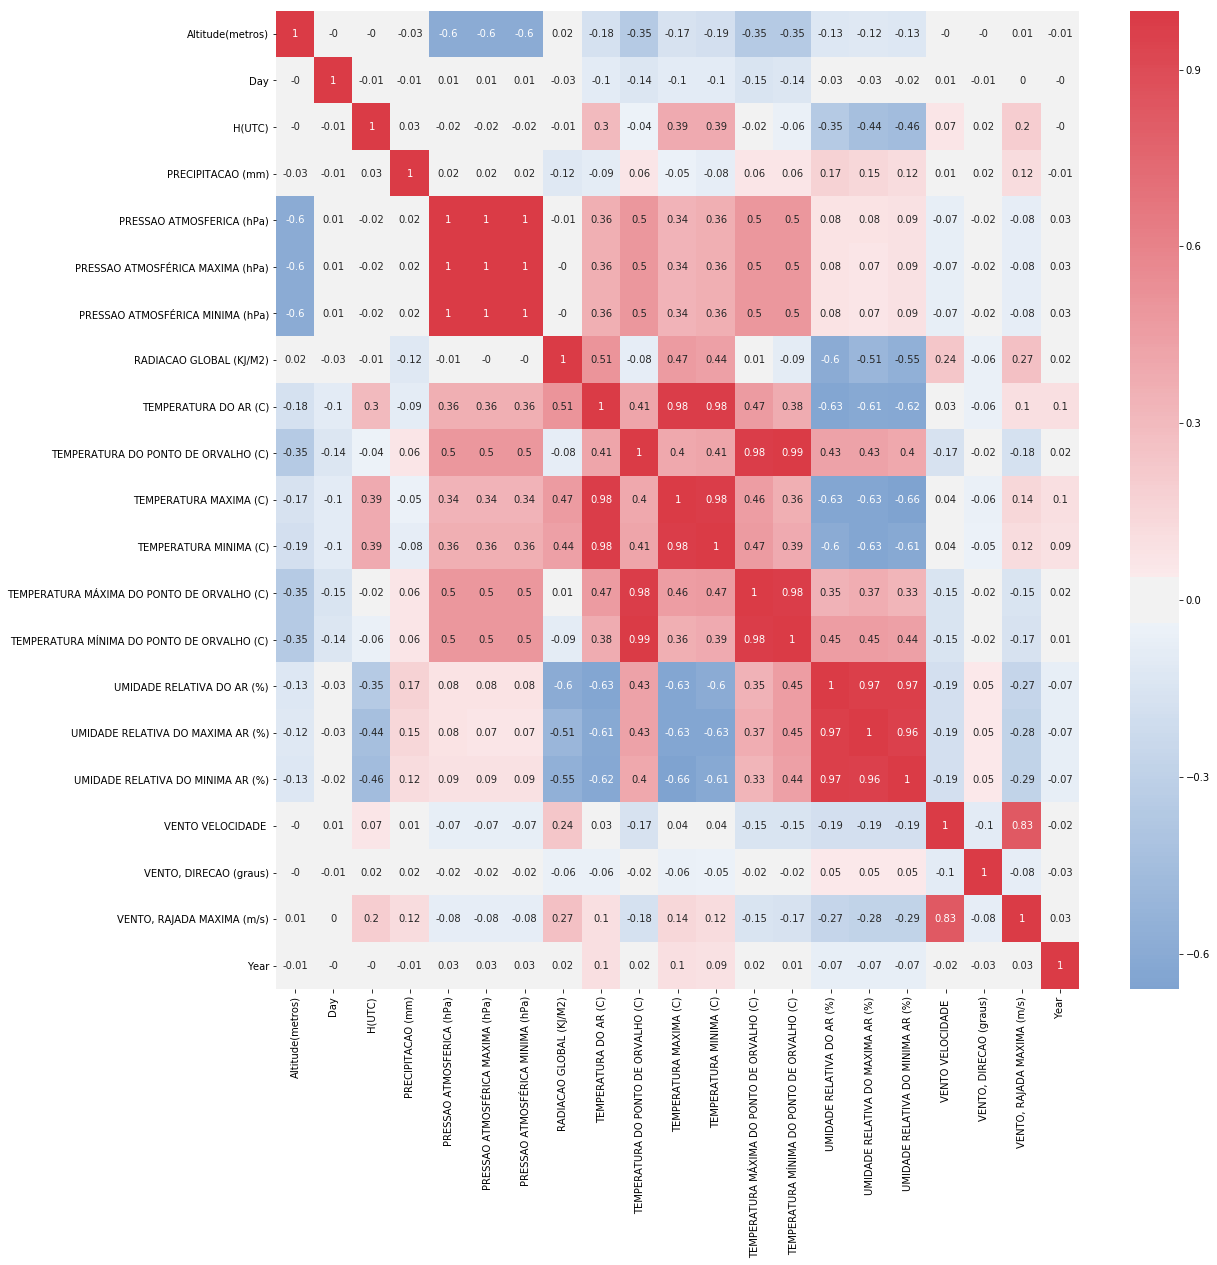

In [14]:
all_columns_num = data.columns.tolist()
all_columns_num.remove('Nome')
all_columns_num.remove('Month')
all_columns_num.remove('Latitude')
all_columns_num.remove('Longitude')
all_columns_num.remove('Codigo OMM')
all_columns_num.remove('Cidade')
all_columns_num.remove('Estado')
all_columns_num.remove('Regiao')
data_clean = data.dropna()
cor_matrix = data_clean[all_columns_num].corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(18,18));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

## Fazendo um mapa para verificar como esta cada estação em relação a dados ausentes e a consistencias dos dados

In [4]:
def make_marker(name,lat,long,alt, temp_min,temp_max, temp_min_min,temp_min_max,
                temp_max_min,temp_max_max, prep_min,prep_max, ur_min,ur_max,
                ur_min_min,ur_min_max, ur_max_min,ur_max_max, miss_data_temp_min,
                miss_data_temp_max, miss_data_prep, miss_data_ur_min, miss_data_ur_max,
                miss_data_ur,color):
    return folium.Marker(location=[df_temp['Latitude'].unique()[0],df_temp['Longitude'].unique()[0]], 
                 popup='''
                 Name: {:s}
                 Latitude:{:f}
                 longitude:{:f}
                 Altitude(metros) : {:f}
                 Minimos e Maximos
                 
                 Temperatura do ar: {:f}\t{:f}
                 Temperatura Minima: {:f}\t{:F}
                 Temperatura Maxima:  {:f}\t{:f}
                 Precipitação: {:f}\t{:f}
                 Umidade Relativa: {:f}\t{:f}
                 UR Minima: {:f}\t{:f}
                 UR Maxima: {:f}\t{:f}
                 
                 Dados Ausentes
                 
                 Temperatura Minima: {:f}
                 Temperatura Maxima: {:f}
                 Precipitação: {:f}
                 UR Minima: {:f}
                 UR Maxima: {:f}
                 UR:{:f}
                 '''.format(name,lat,long,alt,
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur), 
                icon=folium.Icon(color=color))

### Problemas procurados

##### - Temperatura minima              > Temperatura Maxima
##### - Temperatura(min,max,do ar)      < 0 OU Temperatura(min,max,do ar)>45
##### - Temperatura minima do Ponto de Orvalho              > Temperatura Maxima do Ponto de Orvalho
##### - Temperatura do Ponto de Orvalho(min,max,do ar)      < 0 OU Temperatura(min,max,do ar)>45
##### - Umidade Relativa(min,max,do ar) < 0 OU Umidade Relativa(min,max,do ar)   >100
##### - Umidade relativa minima         > Umidade relativa maxima
##### - Dados ausentes > 30

In [5]:
#Grupo de marcadores para possivel problemas
fg_miss_data          =      folium.FeatureGroup(name='Miss Data')
fg_temp_inconsistency =      folium.FeatureGroup(name='Temp correlation Inconsistency')
fg_temp_min           =      folium.FeatureGroup(name='Temp minima Inconsistency')
fg_temp               =      folium.FeatureGroup(name='Temp air Inconsistency')
fg_temp_max           =      folium.FeatureGroup(name='Temp Maxima Inconsistency')
fg_ur_inconsistency   =      folium.FeatureGroup(name='Umildade Relatica Inconsistency')

df_miss_data = pd.DataFrame(columns = ['Estação','Md_temp_max','Md_temp_min','Md_temp','Md_ur_max','Md_ur_min','MD_ur','Md_prec'])

recovery_list = []
danger_list = []
temp_min_list = []
temp_max_list = []
temp_inconsistency_list = []
temp_list = []
ur_list = []

for name in data['Nome'].unique().tolist():
    
    df_temp = data.loc[lambda df: df.Nome == name, :]
    #Maximo e minimos
    temp_min     = df_temp['TEMPERATURA DO AR (C)'].min()
    temp_max     = df_temp['TEMPERATURA DO AR (C)'].max()
    temp_min_min = df_temp['TEMPERATURA MINIMA (C)'].min()
    temp_min_max = df_temp['TEMPERATURA MINIMA (C)'].max()
    temp_max_min = df_temp['TEMPERATURA MAXIMA (C)'].min()
    temp_max_max = df_temp['TEMPERATURA MAXIMA (C)'].max()
    prep_max     = df_temp['PRECIPITACAO (mm)'].max()
    prep_min     = df_temp['PRECIPITACAO (mm)'].min()
    ur_max       = df_temp['UMIDADE RELATIVA DO AR (%)'].max()
    ur_min       = df_temp['UMIDADE RELATIVA DO AR (%)'].min()
    ur_max_max   = df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'].max()
    ur_max_min   = df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'].min()
    ur_min_max   = df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'].max()
    ur_min_min   = df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'].min()
    #Dados ausentes
    miss_data_temp     = (df_temp['TEMPERATURA DO AR (C)'].isnull().sum()/
                          len(df_temp['TEMPERATURA DO AR (C)']))*100
    miss_data_temp_min = (df_temp['TEMPERATURA MINIMA (C)'].isnull().sum()/
                          len(df_temp['TEMPERATURA MINIMA (C)']))*100
    miss_data_temp_max = (df_temp['TEMPERATURA MAXIMA (C)'].isnull().sum()/
                          len(df_temp['TEMPERATURA MAXIMA (C)']))*100
    miss_data_prep     = (df_temp['PRECIPITACAO (mm)'].isnull().sum()/
                          len(df_temp['PRECIPITACAO (mm)']))*100
    miss_data_ur_min   = (df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'].isnull().sum()/
                          len(df_temp['UMIDADE RELATIVA DO MINIMA AR (%)']))*100
    miss_data_ur_max   = (df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'].isnull().sum()/
                          len(df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)']))*100
    miss_data_ur       = (df_temp['UMIDADE RELATIVA DO AR (%)'].isnull().sum()/
                          len(df_temp['UMIDADE RELATIVA DO AR (%)']))*100
    #Estações com 10% a 50% de dados ausentes poderão ser interpolados
    miss_recovery = (miss_data_temp> 10 and miss_data_temp < 30,
                      miss_data_temp_min> 10 and miss_data_temp_min < 30,
                      miss_data_prep > 10 and miss_data_prep< 30,
                      miss_data_temp_max > 10 and miss_data_temp_max < 30,
                      miss_data_ur > 10 and miss_data_ur < 30,
                      miss_data_ur_max > 10 and miss_data_ur_max < 30,
                      miss_data_ur_min > 10 and miss_data_ur_min < 30)
    #Estações com 50% ou mais de dados ausentes poderam ser eliminadas
    miss_danger = (miss_data_temp > 30,miss_data_temp_min> 30,miss_data_prep> 30,
                   miss_data_temp_max> 30,miss_data_ur> 30,
                   miss_data_ur_max> 30,miss_data_ur_min > 30)
    
    df_miss_data = df_miss_data.append(pd.DataFrame([name,miss_data_temp_max,miss_data_temp_min,miss_data_temp,miss_data_ur_max,
              miss_data_ur_min,miss_data_ur,miss_data_prep], index = df_miss_data.columns.tolist()).T)
    if miss_danger == (1,1,1,1,1,1,1):
        color = 'red'
        danger_list.append(name)
    elif True in miss_recovery:
        color = 'purple'
        recovery_list.append(name)
    else:
        color = 'green'
    fg_miss_data.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
        
    temp_inconsistency = (df_temp['TEMPERATURA MAXIMA (C)'] <= df_temp['TEMPERATURA MINIMA (C)'])
    
    if True in temp_inconsistency:
        color = 'red'
        temp_inconsistency_list.append(name)
    else:
        color = 'green'
    fg_temp_inconsistency.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    if (temp_max_min < 0) or (temp_max_max > 45):
        color = 'red'
        temp_max_list.append(name)
    else:
        color = 'green'
    fg_temp_max.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    if (temp_min < 0) or (temp_max > 45):
        color = 'red'
        temp_list.append(name)
    else:
        color = 'green'
    fg_temp_inconsistency.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    if (temp_min_min < 0) or (temp_min_max > 45):
        color = 'red'
        temp_min_list.append(name)
    else:
        color = 'green'
    
    fg_temp_min.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    ur_min_danger = (ur_min < 0, ur_max_min < 0, ur_min_min < 0 )
    ur_max_danger = (ur_max >100,ur_max_max>100,ur_min_max>100)
    ur_inconsistency = (df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'] <= df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'])
   
    if (True in ur_min_danger) or (True in ur_max_danger) or (True in ur_inconsistency):
        color = 'red'
        ur_list.append(name)
    else:
        color = 'green'
    fg_ur_inconsistency.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))

map_miss_data          = folium.Map()
map_temp_inconsistency = folium.Map()
map_temp_min           = folium.Map()
map_temp_max           = folium.Map()
map_ur_inconsistency   = folium.Map()
map_miss_data.add_child(fg_miss_data).save(str(path_to_save+month_num+'/map_'+month_num+'_miss_data.html'))
map_temp_inconsistency.add_child(fg_temp_inconsistency).save(path_to_save+month_num+'/map_'+month_num+'_temp_incosistency.html')
map_temp_min.add_child(fg_temp_min).save(path_to_save+month_num+'/map_'+month_num+'_temp_min.html')
map_temp_max.add_child(fg_temp_max).save(path_to_save+month_num+'/map_'+month_num+'_temp_max.html')
map_ur_inconsistency.add_child(fg_ur_inconsistency).save(path_to_save+month_num+'/map_'+month_num+'_ur_incosistency.html')

df_miss_data = df_miss_data.reset_index(drop=True)
df_miss_data.to_csv(str(path_to_save+month_num+'/'+'Data_miss.csv'))

# Analisando as possiveis incosistencia nos dados 
## Verificando os dados da Umidade relativa

In [6]:
len(ur_list)

1

In [7]:
ur_list

['Parque Estadual Chandless-A102']

In [8]:
df_temp = data.loc[lambda df: df.Nome == ur_list[0], :].reset_index()
errors = df_temp.loc[df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)']<=df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'],:]['index'].tolist()
data.iloc[errors][['UMIDADE RELATIVA DO MAXIMA AR (%)','UMIDADE RELATIVA DO MINIMA AR (%)','UMIDADE RELATIVA DO AR (%)']].count()

UMIDADE RELATIVA DO MAXIMA AR (%)    775
UMIDADE RELATIVA DO MINIMA AR (%)    775
UMIDADE RELATIVA DO AR (%)           775
dtype: int64

Como podemos ver os dados de umidade estão todos iguais nestes registros, por isso iremos retila-los

In [9]:
data.loc[errors,'UMIDADE RELATIVA DO MAXIMA AR (%)'] = np.nan
data.loc[errors,'UMIDADE RELATIVA DO MINIMA AR (%)'] = np.nan
data.loc[errors,'UMIDADE RELATIVA DO AR (%)'] = np.nan

## Incosistencia nos dados de temperatura

In [10]:
temp_inconsistency_list

['Parque Estadual Chandless-A102']

### Foi encontrado apenas uma estação com incosistencia de dados de temperatura, vamos ver estes erros

In [11]:
df_temp = data.loc[lambda df: df.Nome == 'Parque Estadual Chandless-A102', :].reset_index()
errors = df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<=df_temp['TEMPERATURA MINIMA (C)'],:]['index'].tolist()
data.iloc[errors].count()

Altitude(metros)                              8
Codigo OMM                                    8
Day                                           8
H(UTC)                                        8
Latitude                                      8
Longitude                                     8
Month                                         8
Nome                                          8
PRECIPITACAO (mm)                             8
PRESSAO ATMOSFERICA (hPa)                     8
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              8
PRESSAO ATMOSFÉRICA MINIMA (hPa)              8
RADIACAO GLOBAL (KJ/M2)                       3
TEMPERATURA DO AR (C)                         8
TEMPERATURA DO PONTO DE ORVALHO (C)           8
TEMPERATURA MAXIMA (C)                        8
TEMPERATURA MINIMA (C)                        8
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)    8
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)    8
UMIDADE RELATIVA DO AR (%)                    1
UMIDADE RELATIVA DO MAXIMA AR (%)       

#### Apenas uma estação foi encontrada com incosistencia na temperatura, e este problema é por causa que os dados de temperatura estão todos iguais

In [12]:
data.loc[errors,'TEMPERATURA DO AR (C)'] = np.nan
data.loc[errors,'TEMPERATURA MAXIMA (C)'] = np.nan
data.loc[errors,'TEMPERATURA MINIMA (C)'] = np.nan

## Possiveis erros de temperatura maxima

In [13]:
len(temp_max_list)

5

In [14]:
temp_max_list

['Goiânia-A002',
 'São José dos Ausentes-A829',
 'São Joaquim-A815',
 'Morro da Igreja (Bom Jardim da Serra)-A845',
 'Rio do Campo-A861']

In [29]:
map_temp_max

In [29]:
df_temp = data.loc[lambda df: df.Nome == temp_max_list[0], :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:]

Altitude(metros)  Codigo OMM  Day  H(UTC)   Latitude  Longitude  \
445349             727.0     86734.0   29       5 -16.642841 -49.220222   

        Month          Nome  PRECIPITACAO (mm)  PRESSAO ATMOSFERICA (hPa)  \
445349      4  Goiânia-A002                0.0                      936.2   

        PRESSAO ATMOSFÉRICA MAXIMA (hPa)  PRESSAO ATMOSFÉRICA MINIMA (hPa)  \
445349                             936.6                             936.2   

        RADIACAO GLOBAL (KJ/M2)  TEMPERATURA DO AR (C)  \
445349                      NaN                    NaN   

        TEMPERATURA DO PONTO DE ORVALHO (C)  TEMPERATURA MAXIMA (C)  \
445349                                  NaN                    -6.8   

        TEMPERATURA MINIMA (C)  TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
445349                     NaN                                        -9.8   

        TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  \
445349                                         NaN   

        UMIDADE RELATIVA DO AR (%)  UMIDADE RELATIVA DO MAXIMA AR (%)  \
445349                        94.0                               94.0   

        UMIDADE RELATIVA DO MINIMA AR (%)  VENTO VELOCIDADE   \
445349                               91.0                0.1   

        VENTO, DIRECAO (graus)  VENTO, RAJADA MAXIMA (m/s)  Year   Cidade  \
445349                   191.0                         1.4  2016  Goiânia   

       Estado        Regiao  
445349  Goias  Centro Oeste

In [30]:
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']>40,:]

Empty DataFrame
Columns: [Altitude(metros), Codigo OMM, Day, H(UTC), Latitude, Longitude, Month, Nome, PRECIPITACAO (mm), PRESSAO ATMOSFERICA (hPa), PRESSAO ATMOSFÉRICA MAXIMA (hPa), PRESSAO ATMOSFÉRICA MINIMA (hPa), RADIACAO GLOBAL (KJ/M2), TEMPERATURA DO AR (C), TEMPERATURA DO PONTO DE ORVALHO (C), TEMPERATURA MAXIMA (C), TEMPERATURA MINIMA (C), TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C), TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C), UMIDADE RELATIVA DO AR (%), UMIDADE RELATIVA DO MAXIMA AR (%), UMIDADE RELATIVA DO MINIMA AR (%), VENTO VELOCIDADE , VENTO, DIRECAO (graus), VENTO, RAJADA MAXIMA (m/s), Year, Cidade, Estado, Regiao]
Index: []

In [31]:
df_temp = data.loc[lambda df: df.Nome == temp_max_list[1], :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:][['TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Nome']]

TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
1127336                     3.7                     4.7   
1127337                     3.4                     3.9   
1127338                     3.2                     3.5   
1127339                     3.1                     3.9   
1127748                     4.7                     4.9   
1127759                     3.8                     4.4   
1127760                     3.5                     3.9   
1127761                     3.6                     3.9   
1127762                     3.4                     3.8   
1127763                     3.5                     3.8   
1127764                     2.8                     3.8   
1127765                     3.1                     3.7   
1127766                     3.1                     3.4   
1127767                     2.9                     3.3   
1127768                     2.8                     3.1   
1127769                     2.8                     3.3   
1127770                     2.3                     3.5   
1128122                     2.9                     4.4   
1128123                     2.1                     3.0   
1128124                     1.0                     2.1   
1128125                     0.3                     1.0   
1128126                    -0.3                     0.4   
1128127                    -0.3                     0.0   
1128128                    -1.1                    -0.1   
1128129                    -1.2                    -0.2   
1128130                    -1.5                    -0.8   
1128131                    -0.9                     0.4   
1128132                     0.4                     2.3   
1128133                     2.0                     4.4   
1128143                     3.2                     3.9   
...                         ...                     ...   
1133857                     2.1                     3.3   
1133858                     1.8                     2.5   
1133859                     1.5                     2.5   
1133860                     0.9                     1.7   
1133861                     1.0                     1.3   
1133862                     0.5                     1.2   
1133863                     0.5                     1.2   
1133864                     0.0                     1.0   
1133865                     0.5                     1.1   
1133866                     0.3                     0.8   
1133867                     0.0                     1.4   
1133868                     1.4                     4.2   
1133878                     4.5                     4.8   
1133879                     3.9                     4.6   
1133880                     3.9                     4.7   
1133881                     3.3                     4.0   
1133882                     2.9                     3.5   
1133883                     1.5                     2.9   
1133884                     0.7                     1.6   
1133885                     0.6                     1.0   
1133886                     0.8                     1.0   
1133887                     0.9                     1.2   
1133888                     1.2                     1.5   
1133889                     1.4                     1.6   
1133890                     1.6                     1.9   
1133891                     1.8                     2.1   
1133892                     2.0                     2.8   
1133893                     2.5                     3.8   
1133902                     3.1                     4.0   
1133903                     2.9                     3.4   

         TEMPERATURA DO AR (C)  Year  Day  H(UTC)                        Nome  
1127336                    3.7  2007   27       8  São José dos Ausentes-A829  
1127337                    3.4  2007   27       9  São José dos Ausentes-A829  
1127338                    3.2  2007   27      10  São José dos Ausentes-A829  
1127339                    3.9

In [32]:
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']>40,:]

Empty DataFrame
Columns: [Altitude(metros), Codigo OMM, Day, H(UTC), Latitude, Longitude, Month, Nome, PRECIPITACAO (mm), PRESSAO ATMOSFERICA (hPa), PRESSAO ATMOSFÉRICA MAXIMA (hPa), PRESSAO ATMOSFÉRICA MINIMA (hPa), RADIACAO GLOBAL (KJ/M2), TEMPERATURA DO AR (C), TEMPERATURA DO PONTO DE ORVALHO (C), TEMPERATURA MAXIMA (C), TEMPERATURA MINIMA (C), TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C), TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C), UMIDADE RELATIVA DO AR (%), UMIDADE RELATIVA DO MAXIMA AR (%), UMIDADE RELATIVA DO MINIMA AR (%), VENTO VELOCIDADE , VENTO, DIRECAO (graus), VENTO, RAJADA MAXIMA (m/s), Year, Cidade, Estado, Regiao]
Index: []

In [33]:
df_temp = data.loc[lambda df: df.Nome == temp_max_list[2], :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:][['TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Nome']]

TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
1288127                     3.6                     4.8   
1288128                     2.7                     3.7   
1288129                     1.6                     2.8   
1288130                     0.9                     2.0   
1288131                     0.9                     1.3   
1288132                     0.2                     1.1   
1288133                     0.1                     0.7   
1288134                     0.4                     0.8   
1288135                    -0.2                     0.6   
1288136                    -0.5                     0.2   
1288137                    -0.5                     0.4   
1288138                     0.3                     2.7   
1288489                     4.2                     4.5   
1288490                     3.6                     4.4   
1288491                     2.4                     3.6   
1288492                     0.8                     2.4   
1288493                    -0.4                     0.7   
1288494                    -0.9                    -0.4   
1288496                    -2.1                    -1.3   
1288497                    -2.0                    -1.6   
1288498                    -2.2                    -1.6   
1288499                    -1.7                    -0.3   
1288500                    -0.3                     1.8   
1288501                     1.7                     4.8   
1291234                     3.1                     4.1   
1291371                     4.3                     4.6   
1291372                     4.1                     4.4   
1291373                     3.8                     4.1   
1291374                     4.1                     4.2   
1291375                     3.9                     4.2   
...                         ...                     ...   
1294224                     1.6                     3.0   
1294225                     1.1                     2.1   
1294226                     1.6                     2.5   
1294227                     1.8                     2.4   
1294228                     0.9                     1.8   
1294229                     1.1                     2.1   
1294230                     1.7                     2.3   
1294231                     1.2                     2.0   
1294232                     0.8                     1.5   
1294233                     0.5                     1.2   
1294234                     0.4                     0.8   
1294235                     0.7                     2.2   
1294236                     2.2                     4.9   
1294249                     3.5                     4.2   
1294250                     3.0                     3.8   
1294251                     2.6                     3.0   
1294252                     1.7                     2.7   
1294253                     1.4                     1.8   
1294254                     0.6                     1.6   
1294255                    -0.5                     0.6   
1294256                    -0.7                    -0.3   
1294257                    -0.8                    -0.2   
1294258                    -0.2                     0.4   
1294259                     0.4                     1.4   
1294260                     1.2                     1.9   
1294261                     1.8                     3.2   
1294262                     3.1                     4.7   
1294269                     3.1                     4.3   
1294270                     2.1                     3.1   
1294271                     1.7                     2.3   

         TEMPERATURA DO AR (C)  Year  Day  H(UTC)              Nome  
1288127                    3.6  2008   14      23  São Joaquim-A815  
1288128                    2.8  2008   15       0  São Joaquim-A815  
1288129                    1.6  2008   15       1  São Joaquim-A815  
1288130                    0.9  2008   15       2  São Joaquim-A815  


In [33]:
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']>40,:]

Empty DataFrame
Columns: [Altitude(metros), Codigo OMM, Day, H(UTC), Latitude, Longitude, Month, Nome, PRECIPITACAO (mm), PRESSAO ATMOSFERICA (hPa), PRESSAO ATMOSFÉRICA MAXIMA (hPa), PRESSAO ATMOSFÉRICA MINIMA (hPa), RADIACAO GLOBAL (KJ/M2), TEMPERATURA DO AR (C), TEMPERATURA DO PONTO DE ORVALHO (C), TEMPERATURA MAXIMA (C), TEMPERATURA MINIMA (C), TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C), TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C), UMIDADE RELATIVA DO AR (%), UMIDADE RELATIVA DO MAXIMA AR (%), UMIDADE RELATIVA DO MINIMA AR (%), VENTO VELOCIDADE , VENTO, DIRECAO (graus), VENTO, RAJADA MAXIMA (m/s), Year, Cidade, Estado, Regiao]
Index: []

In [34]:
df_temp = data.loc[lambda df: df.Nome == temp_max_list[3], :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:][['TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Nome']]

TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
1314044                     3.6                     4.4   
1314045                     3.0                     3.6   
1314046                     2.4                     2.9   
1314047                     1.8                     2.5   
1314048                     1.7                     2.0   
1314049                     1.5                     1.9   
1314050                    -0.6                     1.6   
1314051                    -0.6                     0.2   
1314052                     0.1                     1.7   
1314053                     1.4                     2.2   
1314054                     0.8                     2.7   
1314055                     1.9                     2.9   
1314056                     1.3                     2.9   
1314057                     1.2                     2.1   
1314058                     1.6                     2.3   
1314059                     1.9                     4.2   
1314411                     0.7                     4.2   
1314414                     0.7                     3.3   
1314415                     0.2                     2.0   
1314416                     0.2                     1.6   
1314417                    -0.9                     1.4   
1314418                    -1.0                     0.7   
1314419                    -0.4                     0.7   
1314420                     0.4                     1.4   
1314421                     1.4                     2.2   
1314430                     3.2                     4.7   
1314431                     2.4                     4.0   
1315282                     4.3                     4.7   
1315283                     3.8                     4.5   
1315284                     3.6                     4.1   
...                         ...                     ...   
1320156                    -0.6                     0.7   
1320157                     0.7                     2.0   
1320158                     1.0                     3.2   
1320159                     2.5                     4.5   
1320165                     3.3                     4.1   
1320166                     2.7                     3.3   
1320167                     2.6                     2.7   
1320168                     2.5                     2.7   
1320169                     2.2                     2.5   
1320170                     1.8                     2.4   
1320171                     1.5                     1.8   
1320172                     0.8                     1.5   
1320173                     0.0                     0.8   
1320174                    -0.3                     0.6   
1320175                    -0.2                     1.8   
1320176                     0.6                     2.0   
1320177                    -0.1                     2.2   
1320178                    -1.1                     1.3   
1320179                    -1.8                     0.2   
1320180                    -1.5                     0.5   
1320181                    -0.3                     2.0   
1320182                     1.6                     3.2   
1320183                     2.4                     3.8   
1320184                     3.3                     3.9   
1320185                     3.6                     4.6   
1320187                     3.2                     4.3   
1320188                     2.0                     3.3   
1320189                     0.5                     2.0   
1320190                     0.1                     0.8   
1320191                    -0.2                     0.4   

         TEMPERATURA DO AR (C)  Year  Day  H(UTC)  \
1314044                    3.6  2008   14      20   
1314045                    3.0  2008   14      21   
1314046                    2.5  2008   14      22   
1314047                    1.8  2008   14      23   
1314048                    1.9  2008   15       0   
1314049                    1.6  

In [35]:
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']>40,:]

Empty DataFrame
Columns: [Altitude(metros), Codigo OMM, Day, H(UTC), Latitude, Longitude, Month, Nome, PRECIPITACAO (mm), PRESSAO ATMOSFERICA (hPa), PRESSAO ATMOSFÉRICA MAXIMA (hPa), PRESSAO ATMOSFÉRICA MINIMA (hPa), RADIACAO GLOBAL (KJ/M2), TEMPERATURA DO AR (C), TEMPERATURA DO PONTO DE ORVALHO (C), TEMPERATURA MAXIMA (C), TEMPERATURA MINIMA (C), TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C), TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C), UMIDADE RELATIVA DO AR (%), UMIDADE RELATIVA DO MAXIMA AR (%), UMIDADE RELATIVA DO MINIMA AR (%), VENTO VELOCIDADE , VENTO, DIRECAO (graus), VENTO, RAJADA MAXIMA (m/s), Year, Cidade, Estado, Regiao]
Index: []

In [36]:
df_temp = data.loc[lambda df: df.Nome == temp_max_list[4], :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:][['TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Nome']]

TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
1360843                     NaN                     3.6   
1360860                     NaN                    -9.6   
1360861                     NaN                    -8.0   
1360863                     NaN                    -4.3   
1360864                     NaN                    -3.1   
1360866                     NaN                    -4.1   
1360868                     NaN                    -3.5   
1360886                     NaN                    -8.1   
1360887                     NaN                    -5.5   
1360888                     NaN                    -2.7   
1360889                     NaN                    -2.6   
1360891                     NaN                    -7.8   
1360892                     NaN                    -5.1   
1362346                     3.7                     4.9   
1364787                     4.2                     4.7   
1364788                     3.5                     4.4   
1364789                     3.0                     3.6   
1364790                     2.6                     3.2   
1364791                     2.8                     3.1   
1364792                     2.9                     3.2   
1364793                     3.1                     3.3   
1364794                     2.8                     3.1   
1364795                     3.1                     4.2   

         TEMPERATURA DO AR (C)  Year  Day  H(UTC)               Nome  
1360843                    2.2  2011   14      19  Rio do Campo-A861  
1360860                   -9.6  2011   15      12  Rio do Campo-A861  
1360861                   -8.0  2011   15      13  Rio do Campo-A861  
1360863                   -4.3  2011   15      15  Rio do Campo-A861  
1360864                   -3.2  2011   15      16  Rio do Campo-A861  
1360866                   -4.1  2011   15      18  Rio do Campo-A861  
1360868                   -3.5  2011   15      20  Rio do Campo-A861  
1360886                   -8.3  2011   16      14  Rio do Campo-A861  
1360887                   -5.5  2011   16      15  Rio do Campo-A861  
1360888                   -2.7  2011   16      16  Rio do Campo-A861  
1360889                   -5.3  2011   16      17  Rio do Campo-A861  
1360891                   -7.8  2011   16      19  Rio do Campo-A861  
1360892                   -5.1  2011   16      20  Rio do Campo-A861  
1362346                    4.2  2013   17      10  Rio do Campo-A861  
1364787                    4.4  2016   29       3  Rio do Campo-A861  
1364788                    3.6  2016   29       4  Rio do Campo-A861  
1364789                    3.0  2016   29       5  Rio do Campo-A861  
1364790                    2.8  2016   29       6  Rio do Campo-A861  
1364791                    2.9  2016   29       7  Rio do Campo-A861  
1364792                    3.2  2016   29       8  Rio do Campo-A861  
1364793                    3.1  2016   29       9  Rio do Campo-A861  
1364794                    3.1  2016   29      10  Rio do Campo-A861  
1364795                    4.2  2016   29      11  Rio do Campo-A861

In [37]:
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']>40,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
1360622  Rio do Campo-A861                    36.9                    44.2   
1360629  Rio do Campo-A861                    34.7                    44.3   

         TEMPERATURA DO AR (C)  Year  Day  H(UTC)  
1360622                   44.2  2011    5      14  
1360629                   38.3  2011    5      21

In [38]:
temp_max_list.remove('São José dos Ausentes-A829')
temp_max_list.remove('São Joaquim-A815')
temp_max_list.remove('Morro da Igreja (Bom Jardim da Serra)-A845')
temp_max_list

['Goiânia-A002', 'Rio do Campo-A861']

In [39]:
for name in temp_max_list:
    df_temp = data.loc[lambda df: df.Nome == name, :].reset_index()
    errors = df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:]['index'].tolist()
    data.loc[errors,'TEMPERATURA MAXIMA (C)'] = np.nan
    errors = df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']>40,:]['index'].tolist()
    data.loc[errors,'TEMPERATURA MAXIMA (C)'] = np.nan

## Possiveis erros de temperatura minima

In [40]:
len(temp_min_list)

9

In [41]:
temp_min_list

['Goiânia-A002',
 'Niquelândia-A004',
 'São José dos Ausentes-A829',
 'São Joaquim-A815',
 'Morro da Igreja (Bom Jardim da Serra)-A845',
 'Caçador-A859',
 'Lages-A865',
 'Clevelândia-A876',
 'Pirapora-A545']

In [40]:
map_temp_min

In [44]:
df_temp = data.loc[lambda df: df.Nome == temp_min_list[0], :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
440111  Goiânia-A002                    -7.0                    21.5   
445156  Goiânia-A002                     4.2                    18.7   
445336  Goiânia-A002                    -0.1                    15.9   
445338  Goiânia-A002                     2.1                    16.4   
445340  Goiânia-A002                     2.0                    17.3   
445341  Goiânia-A002                    -1.4                    15.9   
445345  Goiânia-A002                     3.5                    13.1   

        TEMPERATURA DO AR (C)  Year  Day  H(UTC)  
440111                    NaN  2009   20      23  
445156                   15.8  2016   21       4  
445336                    5.9  2016   28      16  
445338                   11.1  2016   28      18  
445340                    2.8  2016   28      20  
445341                   15.9  2016   28      21  
445345                    9.7  2016   29       1

In [46]:
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>40,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Empty DataFrame
Columns: [Nome, TEMPERATURA MINIMA (C), TEMPERATURA MAXIMA (C), TEMPERATURA DO AR (C), Year, Day, H(UTC)]
Index: []

In [45]:
df_temp = data.loc[lambda df: df.Nome == temp_min_list[1], :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
459900  Niquelândia-A004                     1.4                    25.2   
460364  Niquelândia-A004                    -1.4                    31.3   
460387  Niquelândia-A004                    -4.4                    31.5   

        TEMPERATURA DO AR (C)  Year  Day  H(UTC)  
459900                   13.6  2007    5      12  
460364                   31.0  2007   24      20  
460387                   31.0  2007   25      19

In [47]:
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>40,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Empty DataFrame
Columns: [Nome, TEMPERATURA MINIMA (C), TEMPERATURA MAXIMA (C), TEMPERATURA DO AR (C), Year, Day, H(UTC)]
Index: []

In [48]:
df_temp = data.loc[lambda df: df.Nome == temp_min_list[2], :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Nome  TEMPERATURA MINIMA (C)  \
1127335  São José dos Ausentes-A829                     4.7   
1127336  São José dos Ausentes-A829                     3.7   
1127337  São José dos Ausentes-A829                     3.4   
1127338  São José dos Ausentes-A829                     3.2   
1127339  São José dos Ausentes-A829                     3.1   
1127340  São José dos Ausentes-A829                     3.7   
1127354  São José dos Ausentes-A829                     4.7   
1127355  São José dos Ausentes-A829                     4.4   
1127356  São José dos Ausentes-A829                     4.7   
1127529  São José dos Ausentes-A829                     4.9   
1127530  São José dos Ausentes-A829                     3.5   
1127747  São José dos Ausentes-A829                     4.6   
1127748  São José dos Ausentes-A829                     4.7   
1127749  São José dos Ausentes-A829                     4.8   
1127758  São José dos Ausentes-A829                     4.4   
1127759  São José dos Ausentes-A829                     3.8   
1127760  São José dos Ausentes-A829                     3.5   
1127761  São José dos Ausentes-A829                     3.6   
1127762  São José dos Ausentes-A829                     3.4   
1127763  São José dos Ausentes-A829                     3.5   
1127764  São José dos Ausentes-A829                     2.8   
1127765  São José dos Ausentes-A829                     3.1   
1127766  São José dos Ausentes-A829                     3.1   
1127767  São José dos Ausentes-A829                     2.9   
1127768  São José dos Ausentes-A829                     2.8   
1127769  São José dos Ausentes-A829                     2.8   
1127770  São José dos Ausentes-A829                     2.3   
1127771  São José dos Ausentes-A829                     2.3   
1128121  São José dos Ausentes-A829                     4.4   
1128122  São José dos Ausentes-A829                     2.9   
...                             ...                     ...   
1133863  São José dos Ausentes-A829                     0.5   
1133864  São José dos Ausentes-A829                     0.0   
1133865  São José dos Ausentes-A829                     0.5   
1133866  São José dos Ausentes-A829                     0.3   
1133867  São José dos Ausentes-A829                     0.0   
1133868  São José dos Ausentes-A829                     1.4   
1133869  São José dos Ausentes-A829                     4.2   
1133877  São José dos Ausentes-A829                     4.7   
1133878  São José dos Ausentes-A829                     4.5   
1133879  São José dos Ausentes-A829                     3.9   
1133880  São José dos Ausentes-A829                     3.9   
1133881  São José dos Ausentes-A829                     3.3   
1133882  São José dos Ausentes-A829                     2.9   
1133883  São José dos Ausentes-A829                     1.5   
1133884  São José dos Ausentes-A829                     0.7   
1133885  São José dos Ausentes-A829                     0.6   
1133886  São José dos Ausentes-A829                     0.8   
1133887  São José dos Ausentes-A829                     0.9   
1133888  São José dos Ausentes-A829                     1.2   
1133889  São José dos Ausentes-A829                     1.4   
1133890  São José dos Ausentes-A829                     1.6   
1133891  São José dos Ausentes-A829                     1.8   
1133892  São José dos Ausentes-A829                     2.0   
1133893  São José dos Ausentes-A829                     2.5   
1133894  São José dos Ausentes-A829                     3.4   
1133895  São José dos Ausentes-A829                     4.8   
1133900  São José dos Ausentes-A829                     4.8   
1133901  São José dos Ausentes-A829                     3.9   
1133902  São José dos Ausentes-A829                     3.1   
1133903  São José dos Ausentes-A829                     2.9   

         TEMPERATURA MAXIMA (C)  TEMPERATURA DO AR (C)  Year  Day  H(UTC)  
1127335                     5.1                 

In [49]:
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>40,:]

Empty DataFrame
Columns: [Altitude(metros), Codigo OMM, Day, H(UTC), Latitude, Longitude, Month, Nome, PRECIPITACAO (mm), PRESSAO ATMOSFERICA (hPa), PRESSAO ATMOSFÉRICA MAXIMA (hPa), PRESSAO ATMOSFÉRICA MINIMA (hPa), RADIACAO GLOBAL (KJ/M2), TEMPERATURA DO AR (C), TEMPERATURA DO PONTO DE ORVALHO (C), TEMPERATURA MAXIMA (C), TEMPERATURA MINIMA (C), TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C), TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C), UMIDADE RELATIVA DO AR (%), UMIDADE RELATIVA DO MAXIMA AR (%), UMIDADE RELATIVA DO MINIMA AR (%), VENTO VELOCIDADE , VENTO, DIRECAO (graus), VENTO, RAJADA MAXIMA (m/s), Year, Cidade, Estado, Regiao]
Index: []

In [50]:
df_temp = data.loc[lambda df: df.Nome == temp_min_list[3], :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<=5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
1288126  São Joaquim-A815                     4.7                     6.6   
1288127  São Joaquim-A815                     3.6                     4.8   
1288128  São Joaquim-A815                     2.7                     3.7   
1288129  São Joaquim-A815                     1.6                     2.8   
1288130  São Joaquim-A815                     0.9                     2.0   
1288131  São Joaquim-A815                     0.9                     1.3   
1288132  São Joaquim-A815                     0.2                     1.1   
1288133  São Joaquim-A815                     0.1                     0.7   
1288134  São Joaquim-A815                     0.4                     0.8   
1288135  São Joaquim-A815                    -0.2                     0.6   
1288136  São Joaquim-A815                    -0.5                     0.2   
1288137  São Joaquim-A815                    -0.5                     0.4   
1288138  São Joaquim-A815                     0.3                     2.7   
1288139  São Joaquim-A815                     2.7                     6.2   
1288488  São Joaquim-A815                     4.5                     6.7   
1288489  São Joaquim-A815                     4.2                     4.5   
1288490  São Joaquim-A815                     3.6                     4.4   
1288491  São Joaquim-A815                     2.4                     3.6   
1288492  São Joaquim-A815                     0.8                     2.4   
1288493  São Joaquim-A815                    -0.4                     0.7   
1288494  São Joaquim-A815                    -0.9                    -0.4   
1288496  São Joaquim-A815                    -2.1                    -1.3   
1288497  São Joaquim-A815                    -2.0                    -1.6   
1288498  São Joaquim-A815                    -2.2                    -1.6   
1288499  São Joaquim-A815                    -1.7                    -0.3   
1288500  São Joaquim-A815                    -0.3                     1.8   
1288501  São Joaquim-A815                     1.7                     4.8   
1288502  São Joaquim-A815                     4.7                     7.4   
1288510  São Joaquim-A815                     4.9                     6.7   
1288511  São Joaquim-A815                     4.1                     5.5   
...                   ...                     ...                     ...   
1294229  São Joaquim-A815                     1.1                     2.1   
1294230  São Joaquim-A815                     1.7                     2.3   
1294231  São Joaquim-A815                     1.2                     2.0   
1294232  São Joaquim-A815                     0.8                     1.5   
1294233  São Joaquim-A815                     0.5                     1.2   
1294234  São Joaquim-A815                     0.4                     0.8   
1294235  São Joaquim-A815                     0.7                     2.2   
1294236  São Joaquim-A815                     2.2                     4.9   
1294237  São Joaquim-A815                     4.6                     7.4   
1294248  São Joaquim-A815                     4.2                     5.6   
1294249  São Joaquim-A815                     3.5                     4.2   
1294250  São Joaquim-A815                     3.0                     3.8   
1294251  São Joaquim-A815                     2.6                     3.0   
1294252  São Joaquim-A815                     1.7                     2.7   
1294253  São Joaquim-A815                     1.4                     1.8   
1294254  São Joaquim-A815                     0.6                     1.6   
1294255  São Joaquim-A815                    -0.5                     0.6   
1294256  São Joaquim-A815                    -0.7                    -0.3   
1294257  São Joaquim-A815                    -0.8                    -0.2   
1294258  São Joaquim-A815                    -0.2                     0.4   
1294259  São Joaq

In [51]:
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>=40,:]

Empty DataFrame
Columns: [Altitude(metros), Codigo OMM, Day, H(UTC), Latitude, Longitude, Month, Nome, PRECIPITACAO (mm), PRESSAO ATMOSFERICA (hPa), PRESSAO ATMOSFÉRICA MAXIMA (hPa), PRESSAO ATMOSFÉRICA MINIMA (hPa), RADIACAO GLOBAL (KJ/M2), TEMPERATURA DO AR (C), TEMPERATURA DO PONTO DE ORVALHO (C), TEMPERATURA MAXIMA (C), TEMPERATURA MINIMA (C), TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C), TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C), UMIDADE RELATIVA DO AR (%), UMIDADE RELATIVA DO MAXIMA AR (%), UMIDADE RELATIVA DO MINIMA AR (%), VENTO VELOCIDADE , VENTO, DIRECAO (graus), VENTO, RAJADA MAXIMA (m/s), Year, Cidade, Estado, Regiao]
Index: []

In [52]:
df_temp = data.loc[lambda df: df.Nome == temp_min_list[4], :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<=5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Nome  TEMPERATURA MINIMA (C)  \
1314043  Morro da Igreja (Bom Jardim da Serra)-A845                     4.2   
1314044  Morro da Igreja (Bom Jardim da Serra)-A845                     3.6   
1314045  Morro da Igreja (Bom Jardim da Serra)-A845                     3.0   
1314046  Morro da Igreja (Bom Jardim da Serra)-A845                     2.4   
1314047  Morro da Igreja (Bom Jardim da Serra)-A845                     1.8   
1314048  Morro da Igreja (Bom Jardim da Serra)-A845                     1.7   
1314049  Morro da Igreja (Bom Jardim da Serra)-A845                     1.5   
1314050  Morro da Igreja (Bom Jardim da Serra)-A845                    -0.6   
1314051  Morro da Igreja (Bom Jardim da Serra)-A845                    -0.6   
1314052  Morro da Igreja (Bom Jardim da Serra)-A845                     0.1   
1314053  Morro da Igreja (Bom Jardim da Serra)-A845                     1.4   
1314054  Morro da Igreja (Bom Jardim da Serra)-A845                     0.8   
1314055  Morro da Igreja (Bom Jardim da Serra)-A845                     1.9   
1314056  Morro da Igreja (Bom Jardim da Serra)-A845                     1.3   
1314057  Morro da Igreja (Bom Jardim da Serra)-A845                     1.2   
1314058  Morro da Igreja (Bom Jardim da Serra)-A845                     1.6   
1314059  Morro da Igreja (Bom Jardim da Serra)-A845                     1.9   
1314060  Morro da Igreja (Bom Jardim da Serra)-A845                     4.1   
1314061  Morro da Igreja (Bom Jardim da Serra)-A845                     5.0   
1314409  Morro da Igreja (Bom Jardim da Serra)-A845                     5.0   
1314410  Morro da Igreja (Bom Jardim da Serra)-A845                     3.6   
1314411  Morro da Igreja (Bom Jardim da Serra)-A845                     0.7   
1314412  Morro da Igreja (Bom Jardim da Serra)-A845                     3.4   
1314413  Morro da Igreja (Bom Jardim da Serra)-A845                     1.9   
1314414  Morro da Igreja (Bom Jardim da Serra)-A845                     0.7   
1314415  Morro da Igreja (Bom Jardim da Serra)-A845                     0.2   
1314416  Morro da Igreja (Bom Jardim da Serra)-A845                     0.2   
1314417  Morro da Igreja (Bom Jardim da Serra)-A845                    -0.9   
1314418  Morro da Igreja (Bom Jardim da Serra)-A845                    -1.0   
1314419  Morro da Igreja (Bom Jardim da Serra)-A845                    -0.4   
...                                             ...                     ...   
1320160  Morro da Igreja (Bom Jardim da Serra)-A845                     4.3   
1320162  Morro da Igreja (Bom Jardim da Serra)-A845                     5.0   
1320164  Morro da Igreja (Bom Jardim da Serra)-A845                     4.1   
1320165  Morro da Igreja (Bom Jardim da Serra)-A845                     3.3   
1320166  Morro da Igreja (Bom Jardim da Serra)-A845                     2.7   
1320167  Morro da Igreja (Bom Jardim da Serra)-A845                     2.6   
1320168  Morro da Igreja (Bom Jardim da Serra)-A845                     2.5   
1320169  Morro da Igreja (Bom Jardim da Serra)-A845                     2.2   
1320170  Morro da Igreja (Bom Jardim da Serra)-A845                     1.8   
1320171  Morro da Igreja (Bom Jardim da Serra)-A845                     1.5   
1320172  Morro da Igreja (Bom Jardim da Serra)-A845                     0.8   
1320173  Morro da Igreja (Bom Jardim da Serra)-A845                     0.0   
1320174  Morro da Igreja (Bom Jardim da Serra)-A845                    -0.3   
1320175  Morro da Igreja (Bom Jardim da Serra)-A845                    -0.2   
1320176  Morro da Igreja (Bom Jardim da Serra)-A845                     0.6   
1320177  Morro da Igreja (Bom Jardim da Serra)-A845                    -0.1   
1320178  Morro da Igreja (Bom Jardim da Serra)-A845                    -1.1   
1320179  Morro da Igreja (Bom Jardim da Serra)-A845                    -1.8   
1320180  Morro da Igreja (Bom Jardim da Serra)-A845                    -1.5   
1320181  Morro da 

In [49]:
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>40,:]

Empty DataFrame
Columns: [Altitude(metros), Codigo OMM, Day, H(UTC), Latitude, Longitude, Month, Nome, PRECIPITACAO (mm), PRESSAO ATMOSFERICA (hPa), PRESSAO ATMOSFÉRICA MAXIMA (hPa), PRESSAO ATMOSFÉRICA MINIMA (hPa), RADIACAO GLOBAL (KJ/M2), TEMPERATURA DO AR (C), TEMPERATURA DO PONTO DE ORVALHO (C), TEMPERATURA MAXIMA (C), TEMPERATURA MINIMA (C), TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C), TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C), UMIDADE RELATIVA DO AR (%), UMIDADE RELATIVA DO MAXIMA AR (%), UMIDADE RELATIVA DO MINIMA AR (%), VENTO VELOCIDADE , VENTO, DIRECAO (graus), VENTO, RAJADA MAXIMA (m/s), Year, Cidade, Estado, Regiao]
Index: []

In [53]:
df_temp = data.loc[lambda df: df.Nome == temp_min_list[5], :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<=5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
1345732  Caçador-A859                     4.4                     5.9   
1345733  Caçador-A859                     3.6                     5.0   
1345734  Caçador-A859                     3.1                     3.9   
1345735  Caçador-A859                     2.7                     3.4   
1345736  Caçador-A859                     2.4                     3.1   
1345737  Caçador-A859                     2.1                     2.8   
1345738  Caçador-A859                     1.4                     2.6   
1345739  Caçador-A859                     1.8                     3.8   
1345740  Caçador-A859                     3.8                     5.2   
1346097  Caçador-A859                     4.8                     5.7   
1346098  Caçador-A859                     2.3                     4.8   
1346099  Caçador-A859                     2.5                     3.0   
1346100  Caçador-A859                     2.8                     4.9   
1346101  Caçador-A859                     4.4                     6.5   
1346358  Caçador-A859                     4.8                     5.9   
1346359  Caçador-A859                     4.5                     5.8   
1346360  Caçador-A859                     4.2                     4.5   
1346361  Caçador-A859                     3.9                     4.3   
1346362  Caçador-A859                     3.6                     4.5   
1346363  Caçador-A859                     4.3                     8.0   
1349330  Caçador-A859                     4.9                     5.7   
1349331  Caçador-A859                     4.1                     5.1   
1349332  Caçador-A859                     3.9                     4.4   
1349333  Caçador-A859                     3.5                     4.0   
1349334  Caçador-A859                     2.8                     3.7   
1349335  Caçador-A859                     2.3                     3.2   
1349336  Caçador-A859                     2.3                     2.9   
1349337  Caçador-A859                     2.1                     2.8   
1349338  Caçador-A859                     2.1                     3.0   
1349339  Caçador-A859                     3.0                     6.0   
...               ...                     ...                     ...   
1351806  Caçador-A859                     4.0                     4.1   
1351807  Caçador-A859                     3.7                     4.0   
1351808  Caçador-A859                     3.5                     3.8   
1351809  Caçador-A859                     3.3                     3.5   
1351810  Caçador-A859                     2.9                     3.4   
1351811  Caçador-A859                     2.9                     3.9   
1351812  Caçador-A859                     3.8                     4.5   
1351813  Caçador-A859                     4.3                     6.1   
1351814  Caçador-A859                     5.0                     7.1   
1351822  Caçador-A859                     4.3                     7.2   
1351823  Caçador-A859                     3.3                     4.5   
1351824  Caçador-A859                     2.3                     3.3   
1351825  Caçador-A859                     1.5                     2.7   
1351826  Caçador-A859                     1.4                     2.0   
1351827  Caçador-A859                     0.4                     1.5   
1351828  Caçador-A859                    -0.2                     0.5   
1351829  Caçador-A859                    -0.4                     0.0   
1351830  Caçador-A859                    -0.5                     0.0   
1351832  Caçador-A859                     0.0                     0.4   
1351833  Caçador-A859                    -0.2                     0.2   
1351835  Caçador-A859                     0.2                     1.9   
1351836  Caçador-A859                     1.9                     5.3   
1351852  Caçador-A859                     4.9                     6.1   
13

In [49]:
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>40,:]

Empty DataFrame
Columns: [Altitude(metros), Codigo OMM, Day, H(UTC), Latitude, Longitude, Month, Nome, PRECIPITACAO (mm), PRESSAO ATMOSFERICA (hPa), PRESSAO ATMOSFÉRICA MAXIMA (hPa), PRESSAO ATMOSFÉRICA MINIMA (hPa), RADIACAO GLOBAL (KJ/M2), TEMPERATURA DO AR (C), TEMPERATURA DO PONTO DE ORVALHO (C), TEMPERATURA MAXIMA (C), TEMPERATURA MINIMA (C), TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C), TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C), UMIDADE RELATIVA DO AR (%), UMIDADE RELATIVA DO MAXIMA AR (%), UMIDADE RELATIVA DO MINIMA AR (%), VENTO VELOCIDADE , VENTO, DIRECAO (graus), VENTO, RAJADA MAXIMA (m/s), Year, Cidade, Estado, Regiao]
Index: []

In [54]:
df_temp = data.loc[lambda df: df.Nome == temp_min_list[6], :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<=5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
1384900  Lages-A865                     5.0                     5.1   
1384901  Lages-A865                     4.5                     5.1   
1384902  Lages-A865                     4.4                     4.6   
1384903  Lages-A865                     4.3                     4.9   
1384904  Lages-A865                     4.9                     5.1   
1384905  Lages-A865                     5.0                     5.2   
1384919  Lages-A865                     5.0                     5.9   
1384920  Lages-A865                     4.9                     5.3   
1384921  Lages-A865                     4.2                     5.3   
1384922  Lages-A865                     3.2                     4.3   
1384923  Lages-A865                     3.1                     3.6   
1384924  Lages-A865                     3.5                     3.7   
1384925  Lages-A865                     3.4                     3.7   
1384926  Lages-A865                     3.1                     3.7   
1384927  Lages-A865                     2.7                     3.3   
1384928  Lages-A865                     2.1                     2.8   
1384929  Lages-A865                     1.4                     2.2   
1384930  Lages-A865                     0.9                     1.6   
1384931  Lages-A865                     1.0                     2.6   
1384932  Lages-A865                     2.6                     3.9   
1384933  Lages-A865                     3.1                     3.9   
1384934  Lages-A865                     3.7                     5.0   
1384935  Lages-A865                     4.4                     6.5   
1384944  Lages-A865                     4.1                     5.9   
1384945  Lages-A865                     3.0                     4.5   
1384946  Lages-A865                     2.7                     3.5   
1384947  Lages-A865                     1.9                     2.9   
1384948  Lages-A865                     1.4                     2.2   
1384949  Lages-A865                     0.9                     2.0   
1384950  Lages-A865                     0.6                     1.3   
1384951  Lages-A865                     0.0                     0.9   
1384952  Lages-A865                    -0.3                     0.2   
1384953  Lages-A865                    -0.2                     0.3   
1384954  Lages-A865                     0.1                     1.3   
1384955  Lages-A865                     0.6                     1.3   
1384956  Lages-A865                     1.0                     4.8   
1384957  Lages-A865                     4.0                     7.9   
1384971  Lages-A865                     4.9                     5.9   
1384972  Lages-A865                     4.1                     5.0   
1384973  Lages-A865                     4.1                     4.5   
1384974  Lages-A865                     4.2                     4.5   
1384975  Lages-A865                     3.9                     4.2   
1384976  Lages-A865                     3.4                     3.9   
1384977  Lages-A865                     2.7                     3.4   
1384978  Lages-A865                     2.9                     3.5   
1384979  Lages-A865                     3.4                     4.2   
1384980  Lages-A865                     4.2                     5.4   

         TEMPERATURA DO AR (C)  Year  Day  H(UTC)  
1384900                    5.1  2016   27       4  
1384901                    4.5  2016   27       5  
1384902                    4.5  2016   27       6  
1384903                    4.8  2016   27       7  
1384904                    5.0  2016   27       8  
1384905                    5.2  2016   27       9  
1384919                    5.1  2016   27      23  
1384920                    5.3  2016   28       0  
1384921                    4.2  2016   28       1  
1384922                    3.3  2016   28       2  
1384923                    3.6  20

In [49]:
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>40,:]

Empty DataFrame
Columns: [Altitude(metros), Codigo OMM, Day, H(UTC), Latitude, Longitude, Month, Nome, PRECIPITACAO (mm), PRESSAO ATMOSFERICA (hPa), PRESSAO ATMOSFÉRICA MAXIMA (hPa), PRESSAO ATMOSFÉRICA MINIMA (hPa), RADIACAO GLOBAL (KJ/M2), TEMPERATURA DO AR (C), TEMPERATURA DO PONTO DE ORVALHO (C), TEMPERATURA MAXIMA (C), TEMPERATURA MINIMA (C), TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C), TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C), UMIDADE RELATIVA DO AR (%), UMIDADE RELATIVA DO MAXIMA AR (%), UMIDADE RELATIVA DO MINIMA AR (%), VENTO VELOCIDADE , VENTO, DIRECAO (graus), VENTO, RAJADA MAXIMA (m/s), Year, Cidade, Estado, Regiao]
Index: []

In [55]:
df_temp = data.loc[lambda df: df.Nome == temp_min_list[7], :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<=5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
1553096  Clevelândia-A876                     4.6                     5.9   
1553097  Clevelândia-A876                     3.9                     4.6   
1553098  Clevelândia-A876                     4.0                     4.7   
1553099  Clevelândia-A876                     4.5                     7.1   
1554841  Clevelândia-A876                     4.4                     5.5   
1554842  Clevelândia-A876                     4.4                     4.5   
1554843  Clevelândia-A876                     4.5                     4.7   
1554844  Clevelândia-A876                     4.5                     4.7   
1554845  Clevelândia-A876                     3.9                     4.5   
1554846  Clevelândia-A876                     3.8                     4.5   
1554847  Clevelândia-A876                     4.5                     4.9   
1554848  Clevelândia-A876                     4.7                     5.0   
1554849  Clevelândia-A876                     4.4                     4.8   
1554850  Clevelândia-A876                     4.6                     4.9   
1554851  Clevelândia-A876                     4.9                     5.3   
1554863  Clevelândia-A876                     3.8                     5.1   
1554864  Clevelândia-A876                     3.0                     4.0   
1554865  Clevelândia-A876                     2.6                     3.5   
1554866  Clevelândia-A876                     2.0                     3.1   
1554867  Clevelândia-A876                     2.0                     2.7   
1554868  Clevelândia-A876                     2.1                     2.9   
1554869  Clevelândia-A876                     2.1                     2.8   
1554870  Clevelândia-A876                     2.0                     2.7   
1554871  Clevelândia-A876                     1.3                     2.2   
1554872  Clevelândia-A876                     1.3                     1.8   
1554873  Clevelândia-A876                     0.6                     1.9   
1554874  Clevelândia-A876                    -0.5                     0.8   
1554875  Clevelândia-A876                     0.0                     1.4   
1554876  Clevelândia-A876                     1.4                     4.1   
1554877  Clevelândia-A876                     3.1                     5.4   
1554878  Clevelândia-A876                     4.7                     6.8   
1554887  Clevelândia-A876                     4.3                     5.3   
1554888  Clevelândia-A876                     3.7                     4.5   
1554889  Clevelândia-A876                     3.3                     4.0   
1554890  Clevelândia-A876                     3.0                     3.8   
1554891  Clevelândia-A876                     3.0                     3.5   
1554892  Clevelândia-A876                     3.0                     3.4   
1554893  Clevelândia-A876                     2.9                     3.4   
1554894  Clevelândia-A876                     3.3                     4.1   
1554895  Clevelândia-A876                     4.1                     5.3   
1554896  Clevelândia-A876                     5.0                     5.5   
1554897  Clevelândia-A876                     4.2                     5.4   
1554898  Clevelândia-A876                     3.0                     5.3   
1554899  Clevelândia-A876                     3.4                     5.9   
1554917  Clevelândia-A876                     5.0                     5.5   
1554918  Clevelândia-A876                     4.9                     5.1   
1554919  Clevelândia-A876                     4.8                     5.0   
1554920  Clevelândia-A876                     4.4                     4.9   
1554921  Clevelândia-A876                     4.6                     4.7   
1554922  Clevelândia-A876                     4.2                     4.7   
1554923  Clevelândia-A876                     4.2                     4.9   
1554924  Clevelân

In [49]:
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>40,:]

Empty DataFrame
Columns: [Altitude(metros), Codigo OMM, Day, H(UTC), Latitude, Longitude, Month, Nome, PRECIPITACAO (mm), PRESSAO ATMOSFERICA (hPa), PRESSAO ATMOSFÉRICA MAXIMA (hPa), PRESSAO ATMOSFÉRICA MINIMA (hPa), RADIACAO GLOBAL (KJ/M2), TEMPERATURA DO AR (C), TEMPERATURA DO PONTO DE ORVALHO (C), TEMPERATURA MAXIMA (C), TEMPERATURA MINIMA (C), TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C), TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C), UMIDADE RELATIVA DO AR (%), UMIDADE RELATIVA DO MAXIMA AR (%), UMIDADE RELATIVA DO MINIMA AR (%), VENTO VELOCIDADE , VENTO, DIRECAO (graus), VENTO, RAJADA MAXIMA (m/s), Year, Cidade, Estado, Regiao]
Index: []

In [56]:
df_temp = data.loc[lambda df: df.Nome == temp_min_list[8], :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<=5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
1916959  Pirapora-A545                     4.8                    23.7   
1916975  Pirapora-A545                    -5.7                     NaN   

         TEMPERATURA DO AR (C)  Year  Day  H(UTC)  
1916959                   22.4  2012   25       7  
1916975                   25.3  2012   25      23

In [49]:
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>40,:]

Empty DataFrame
Columns: [Altitude(metros), Codigo OMM, Day, H(UTC), Latitude, Longitude, Month, Nome, PRECIPITACAO (mm), PRESSAO ATMOSFERICA (hPa), PRESSAO ATMOSFÉRICA MAXIMA (hPa), PRESSAO ATMOSFÉRICA MINIMA (hPa), RADIACAO GLOBAL (KJ/M2), TEMPERATURA DO AR (C), TEMPERATURA DO PONTO DE ORVALHO (C), TEMPERATURA MAXIMA (C), TEMPERATURA MINIMA (C), TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C), TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C), UMIDADE RELATIVA DO AR (%), UMIDADE RELATIVA DO MAXIMA AR (%), UMIDADE RELATIVA DO MINIMA AR (%), VENTO VELOCIDADE , VENTO, DIRECAO (graus), VENTO, RAJADA MAXIMA (m/s), Year, Cidade, Estado, Regiao]
Index: []

In [58]:
temp_min_list = ['Goiânia-A002','Niquelândia-A004','Pirapora-A545']

Mesmo caso do atribulto anterior, e as cidades encontradas nao tem registros de temperatura encontradas tão baixas

In [59]:
for name in temp_min_list:
    df_temp = data.loc[lambda df: df.Nome == name, :].reset_index()
    errors = df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:]['index'].tolist()
    data.loc[errors,'TEMPERATURA MINIMA (C)'] = np.nan

In [60]:
for name in temp_min_list:
    df_temp = data.loc[lambda df: df.Nome == name, :].reset_index()
    errors = df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>40,:]['index'].tolist()
    data.loc[errors,'TEMPERATURA MINIMA (C)'] = np.nan

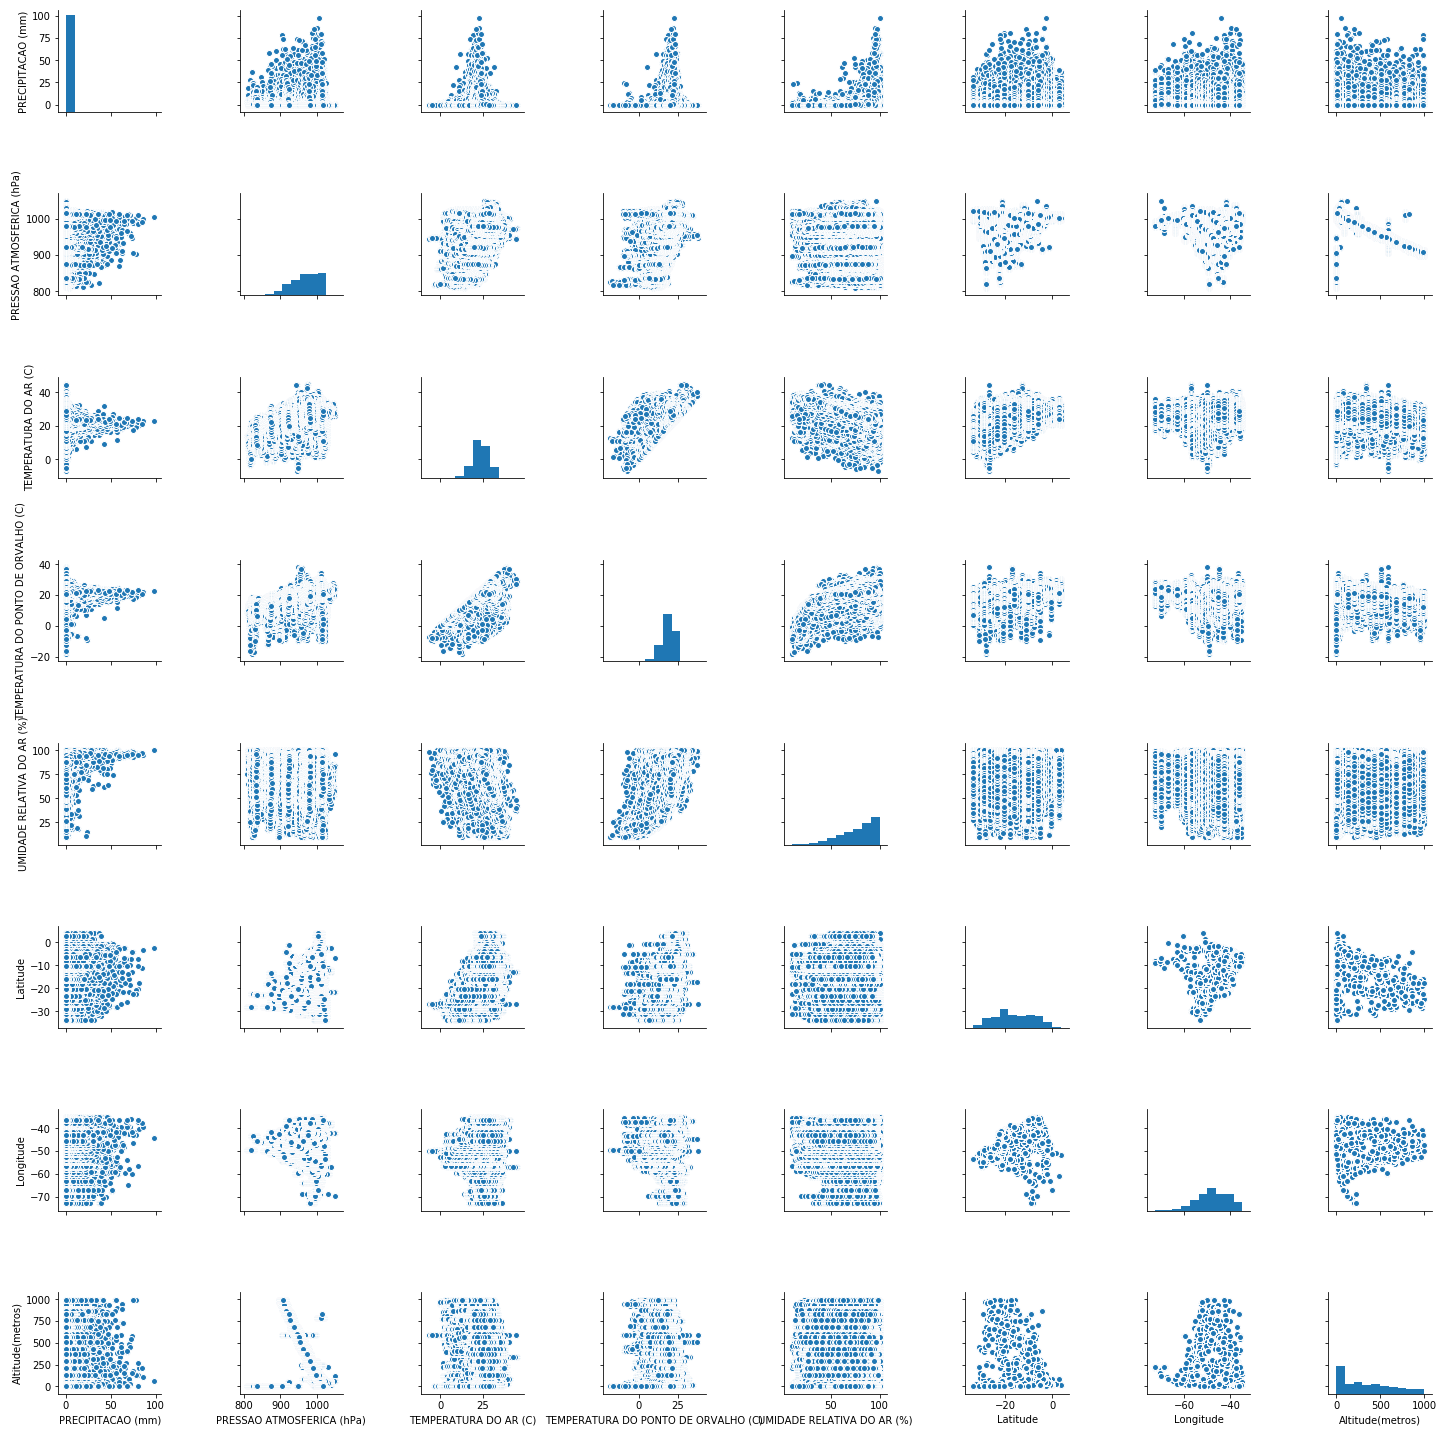

In [61]:
sns.pairplot(data[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)','TEMPERATURA DO PONTO DE ORVALHO (C)',
                   'UMIDADE RELATIVA DO AR (%)','Latitude','Longitude','Altitude(metros)']].dropna(),)

#### Como podemos ver existe alguns dados fora do padrão dos demais registro, como os dados de Pressão atmosferica que podemos perceber que sua relação com Altidude não esta muito correta. iremos retirar este dados também

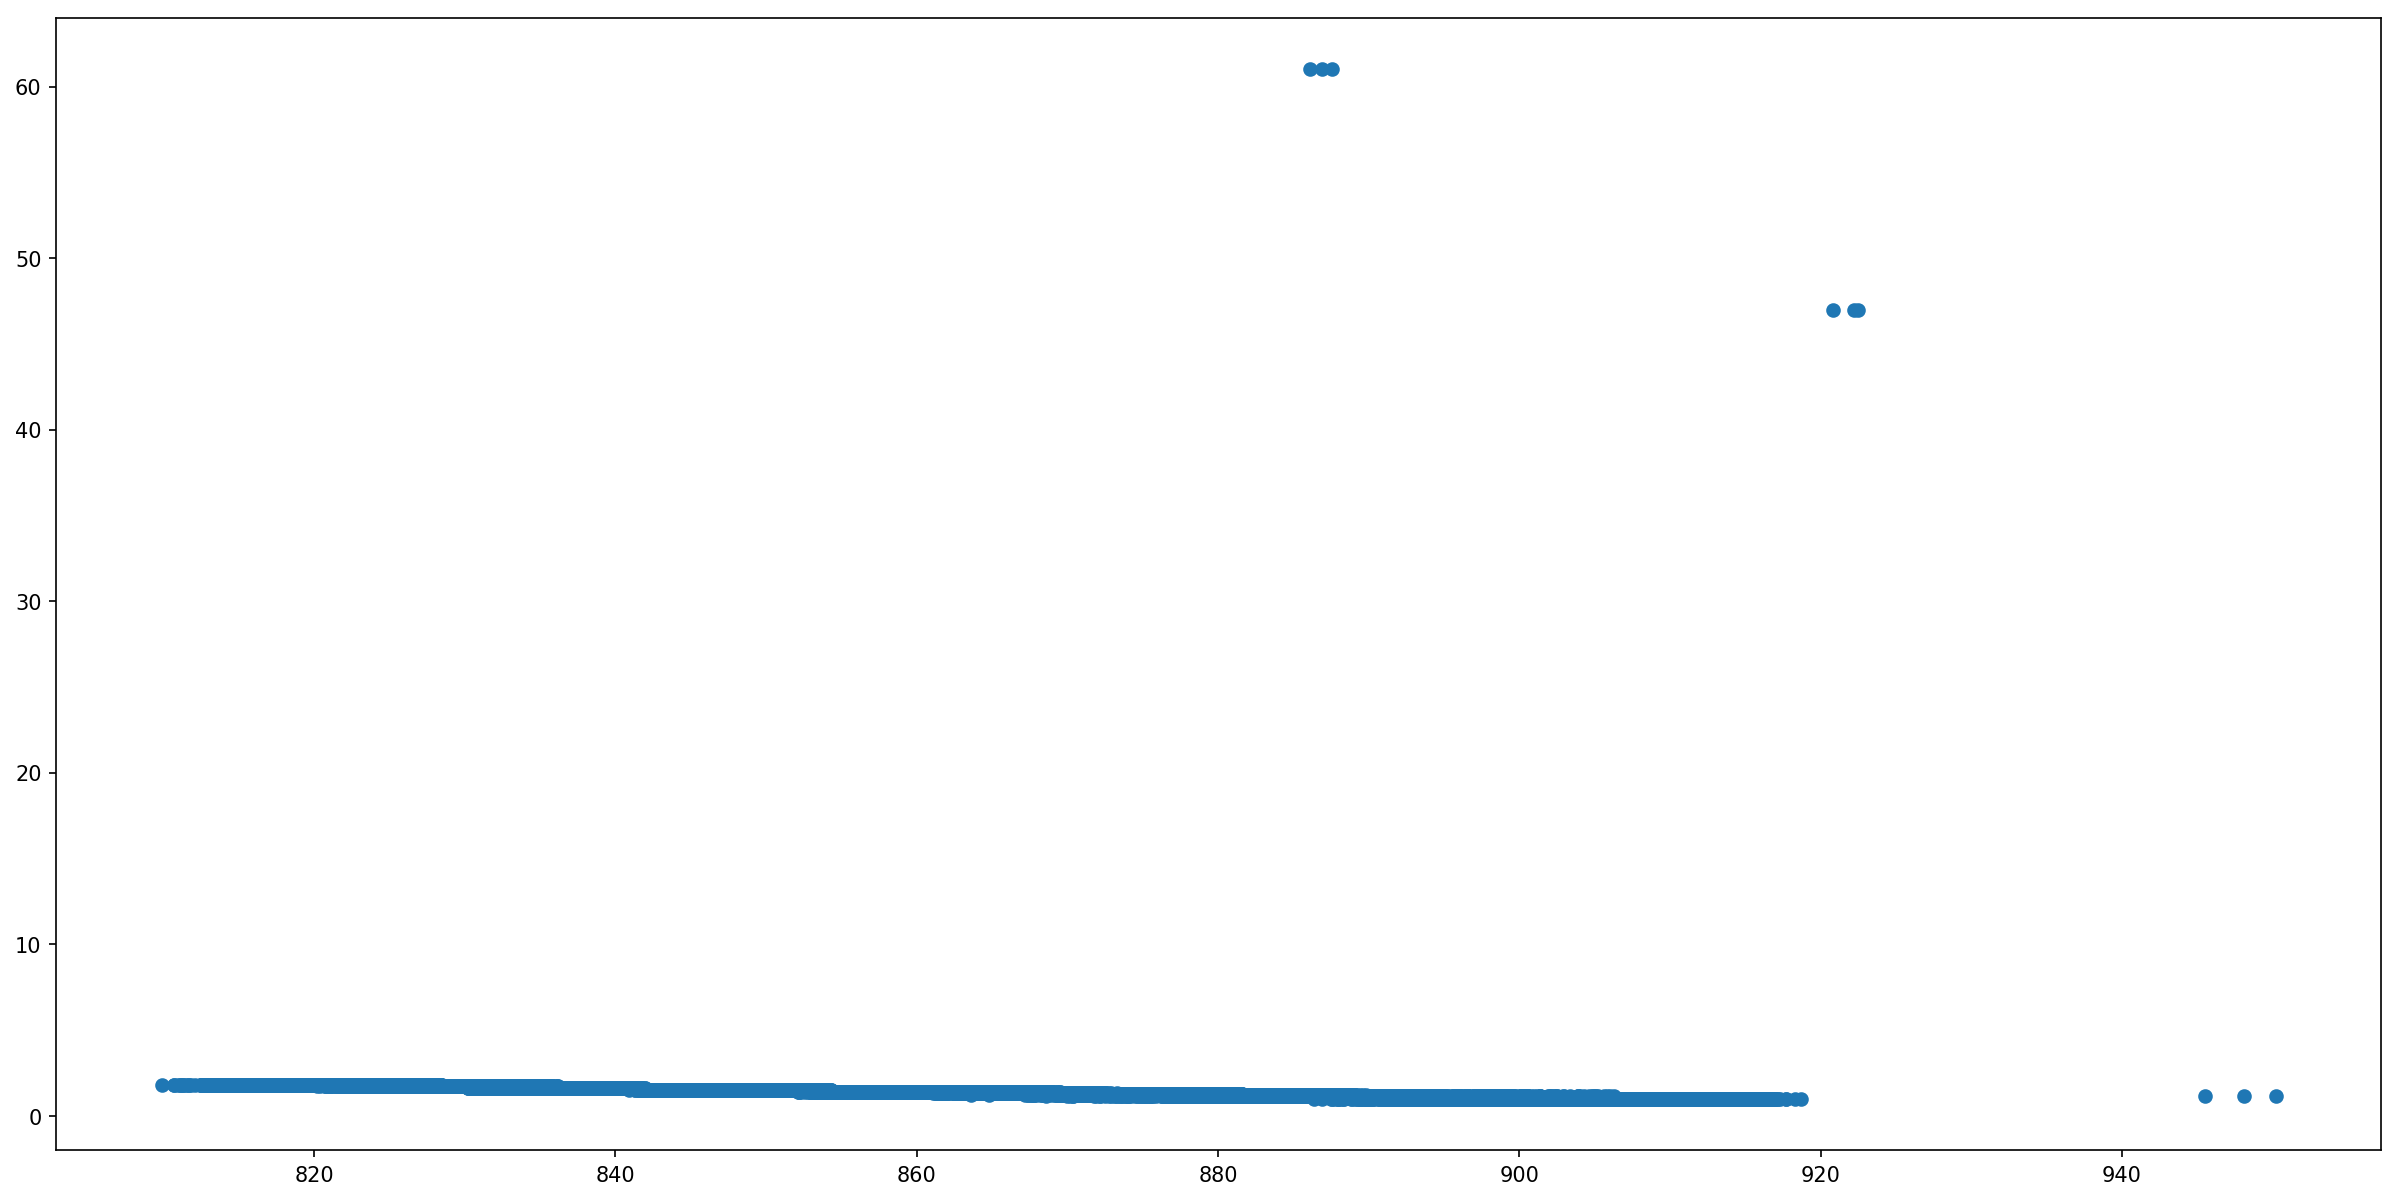

In [64]:
plt.figure(figsize=(20, 10), dpi=150)
plt.scatter(data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<100)&(data['PRESSAO ATMOSFERICA (hPa)']<955),:]['PRESSAO ATMOSFERICA (hPa)'],
           data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<100)&(data['PRESSAO ATMOSFERICA (hPa)']<955),:]['Altitude(metros)'])


In [65]:
data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<100)&(data['PRESSAO ATMOSFERICA (hPa)']<955),:].head(10)

Altitude(metros)  Codigo OMM  Day  H(UTC)   Latitude  Longitude  \
119849            61.000     81699.0    8      17  -2.056558 -60.025756   
119850            61.000     81699.0    8      18  -2.056558 -60.025756   
119851            61.000     81699.0    8      19  -2.056558 -60.025756   
179268            47.000     81682.0   12      12  -1.300875 -47.947967   
179274            47.000     81682.0   12      18  -1.300875 -47.947967   
179280            47.000     81682.0   13       0  -1.300875 -47.947967   
409392             1.161     86715.0    1       0 -15.789343 -47.925756   
409393             1.161     86715.0    1       1 -15.789343 -47.925756   
409394             1.161     86715.0    1       2 -15.789343 -47.925756   
409395             1.161     86715.0    1       3 -15.789343 -47.925756   

        Month                        Nome  PRECIPITACAO (mm)  \
119849      4  Presidente Figueiredo-A126                0.0   
119850      4  Presidente Figueiredo-A126                0.0   
119851      4  Presidente Figueiredo-A126                0.0   
179268      4              Castanhal-A202                0.0   
179274      4              Castanhal-A202                0.0   
179280      4              Castanhal-A202                0.0   
409392      4               Brasília-A001                0.0   
409393      4               Brasília-A001                0.0   
409394      4               Brasília-A001                0.0   
409395      4               Brasília-A001                0.0   

        PRESSAO ATMOSFERICA (hPa)  PRESSAO ATMOSFÉRICA MAXIMA (hPa)  \
119849                      887.6                             888.2   
119850                      886.9                             887.6   
119851                      886.1                             886.9   
179268                      922.5                            1006.9   
179274                      920.8                            1003.9   
179280                      922.2                            1005.8   
409392                      886.8                             886.8   
409393                      887.0                             887.0   
409394                      887.3                             887.4   
409395                      887.5                             887.6   

        PRESSAO ATMOSFÉRICA MINIMA (hPa)  RADIACAO GLOBAL (KJ/M2)  \
119849                             887.6                   87.145   
119850                             886.9                   85.532   
119851                             886.1                   73.587   
179268                            1006.0                      NaN   
179274                            1002.3                      NaN   
179280                            1004.4                      NaN   
409392                             886.2                      NaN   
409393                             886.8                      NaN   
409394                             887.0                      NaN   
409395                             887.2                      NaN   

        TEMPERATURA DO AR (C)  TEMPERATURA DO PONTO DE ORVALHO (C)  \
119849                    NaN                                  NaN   
119850                    NaN                                  NaN   
119851                    NaN                                  NaN   
179268                   27.3                                 25.6   
179274                   28.9                                 23.8   
179280                   24.0                                 22.7   
409392                   21.7                                 16.8   
409393                   20.7                                 16.7   
409394                   20.0                                 16.3   
409395                   19.5                                 16.3   

        TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
119849                     NaN                     NaN   
119850                     NaN                  

In [66]:
errors = data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<100)&(data['PRESSAO ATMOSFERICA (hPa)']<955),:].index.tolist()
print('Numero de resgitros que serão retirados: {}'.format(len(errors)))
data.loc[errors,'PRESSAO ATMOSFERICA (hPa)'] = np.nan

Numero de resgitros que serão retirados: 173085


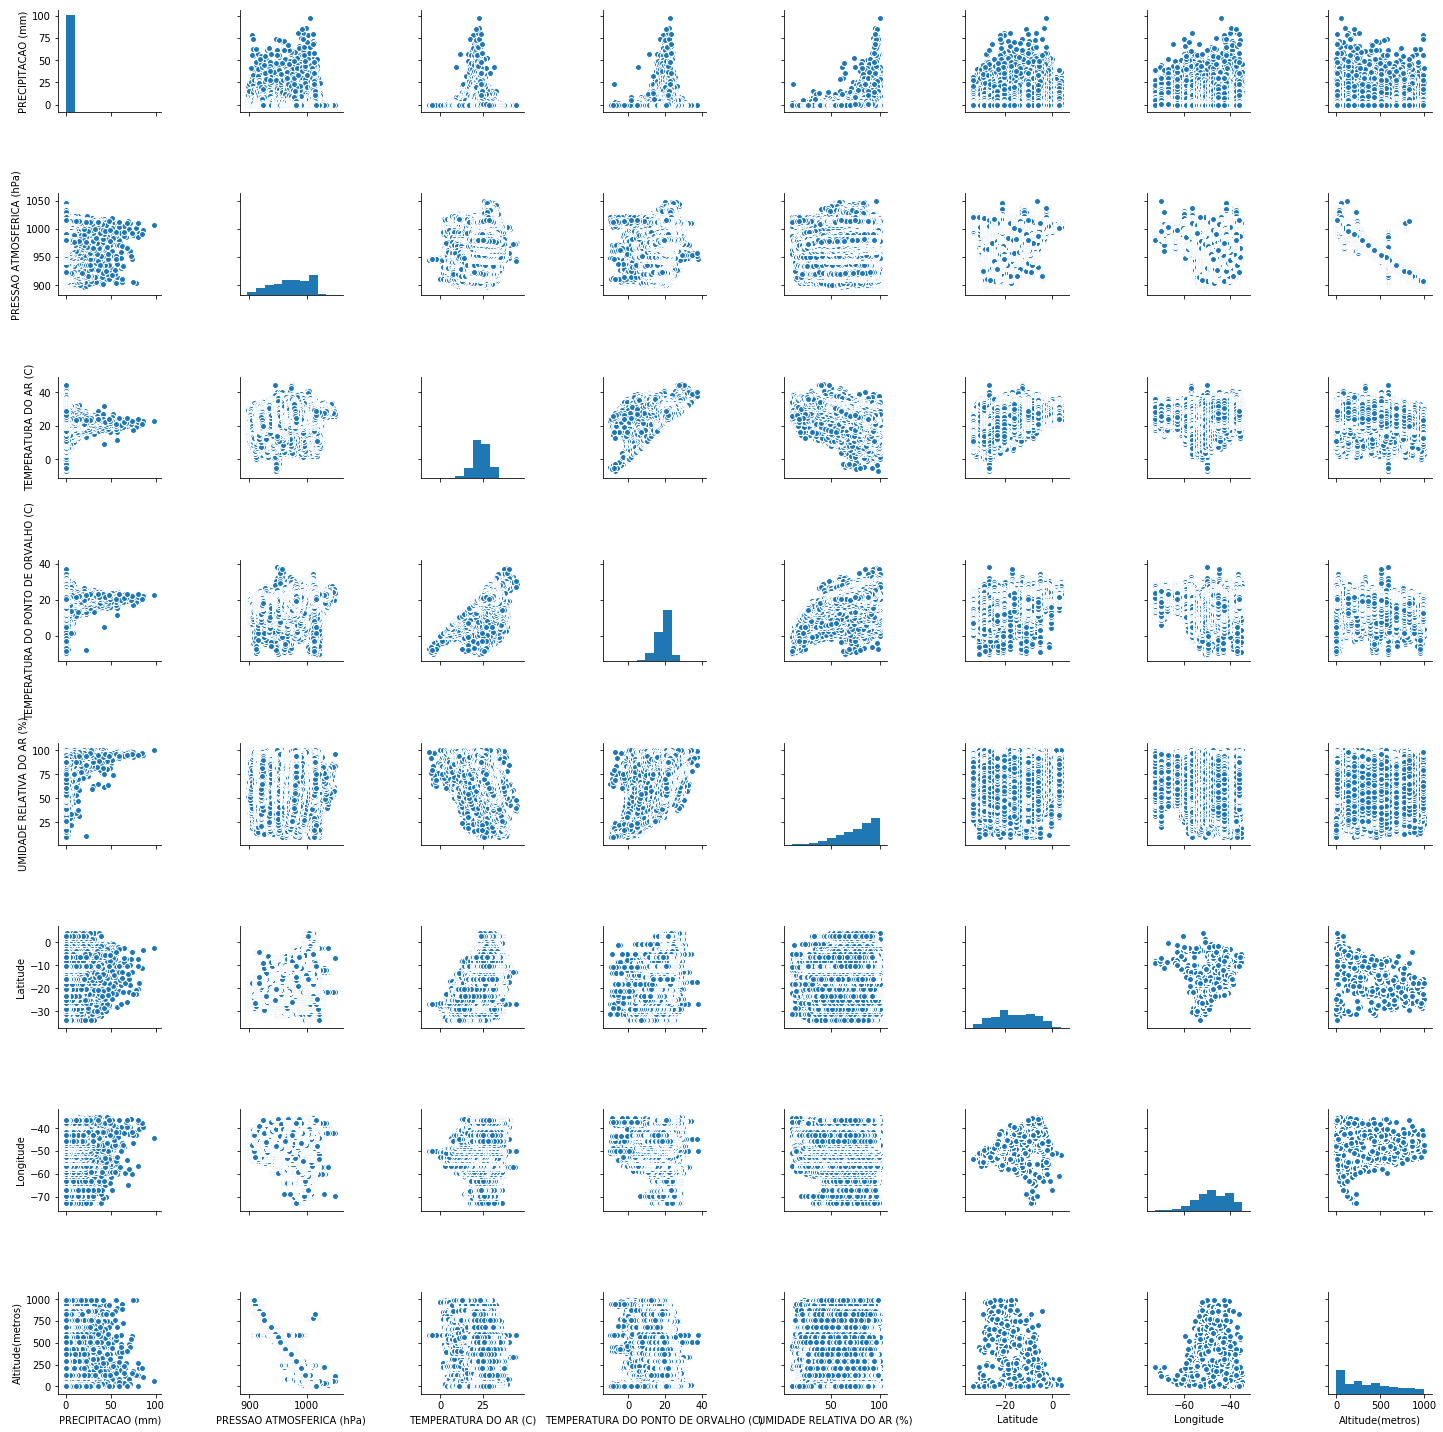

In [67]:
sns.pairplot(data[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)','TEMPERATURA DO PONTO DE ORVALHO (C)',
                   'UMIDADE RELATIVA DO AR (%)','Latitude','Longitude','Altitude(metros)']].dropna(),)

In [68]:
(data.isnull().sum()/len(data))*100

Altitude(metros)                               0.000000
Codigo OMM                                     0.082263
Day                                            0.000000
H(UTC)                                         0.000000
Latitude                                       0.000000
Longitude                                      0.000000
Month                                          0.000000
Nome                                           0.000000
PRECIPITACAO (mm)                             12.396330
PRESSAO ATMOSFERICA (hPa)                     14.240354
PRESSAO ATMOSFÉRICA MAXIMA (hPa)               8.890227
PRESSAO ATMOSFÉRICA MINIMA (hPa)               8.890009
RADIACAO GLOBAL (KJ/M2)                       54.133668
TEMPERATURA DO AR (C)                          8.462772
TEMPERATURA DO PONTO DE ORVALHO (C)            9.731768
TEMPERATURA MAXIMA (C)                         8.469036
TEMPERATURA MINIMA (C)                         8.467727
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     9

## Retirando os dados ausentes

### por trabalhamos com medias não iremos fazer recuperação dos dados ausentes apenas discarta-los.
### mas primeiro iremos descarta o atribulto de radiação global, que ja ele esta ausente em 50% da base

In [69]:
data.drop(columns=['RADIACAO GLOBAL (KJ/M2)','VENTO VELOCIDADE ','VENTO, DIRECAO (graus)','VENTO, RAJADA MAXIMA (m/s)'],inplace=True)

In [70]:
data.dropna(inplace=True)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skt
month_num = str(4)
data = pd.read_csv('./Tempo-Clima/Dados/Brasil_'+month_num+'_data_clean_v2.csv').drop(columns=['Unnamed: 0'])
data.head(5)

Altitude(metros)  Codigo OMM  Day  H(UTC)  Latitude  Longitude  Month  \
0             185.0     81963.0    1       0 -9.358353 -69.926257      4   
1             185.0     81963.0    1       1 -9.358353 -69.926257      4   
2             185.0     81963.0    1       2 -9.358353 -69.926257      4   
3             185.0     81963.0    1       3 -9.358353 -69.926257      4   
4             185.0     81963.0    1       4 -9.358353 -69.926257      4   

                             Nome  PRECIPITACAO (mm)  \
0  Parque Estadual Chandless-A102                1.2   
1  Parque Estadual Chandless-A102                1.2   
2  Parque Estadual Chandless-A102                1.2   
3  Parque Estadual Chandless-A102                1.0   
4  Parque Estadual Chandless-A102                1.0   

   PRESSAO ATMOSFERICA (hPa)   ...    TEMPERATURA MINIMA (C)  \
0                      987.5   ...                      24.7   
1                      988.4   ...                      24.5   
2                      989.1   ...                      24.0   
3                      989.4   ...                      23.9   
4                      990.0   ...                      23.7   

   TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
0                                        23.3   
1                                        23.1   
2                                        23.0   
3                                        23.0   
4                                        22.9   

   TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  UMIDADE RELATIVA DO AR (%)  \
0                                        22.8                        91.0   
1                                        22.9                        91.0   
2                                        22.8                        93.0   
3                                        22.8                        94.0   
4                                        22.8                        95.0   

   UMIDADE RELATIVA DO MAXIMA AR (%)  UMIDADE RELATIVA DO MINIMA AR (%)  Year  \
0                               91.0                               82.0  2009   
1                               92.0                               90.0  2009   
2                               93.0                               90.0  2009   
3                               94.0                               93.0  2009   
4                               95.0                               94.0  2009   

                      Cidade  Estado  Regiao  
0  Parque Estadual Chandless    Acre   Norte  
1  Parque Estadual Chandless    Acre   Norte  
2  Parque Estadual Chandless    Acre   Norte  
3  Parque Estadual Chandless    Acre   Norte  
4  Parque Estadual Chandless    Acre   Norte  

[5 rows x 25 columns]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skt
month_num = str(4)
data = pd.read_csv('./Tempo-Clima/Dados/Brasil_'+month_num+'_data_clean_v2.csv').drop(columns=['Unnamed: 0'])
data.head(5)

Altitude(metros)  Codigo OMM  Day  H(UTC)  Latitude  Longitude  Month  \
0             185.0     81963.0    1       0 -9.358353 -69.926257      4   
1             185.0     81963.0    1       1 -9.358353 -69.926257      4   
2             185.0     81963.0    1       2 -9.358353 -69.926257      4   
3             185.0     81963.0    1       3 -9.358353 -69.926257      4   
4             185.0     81963.0    1       4 -9.358353 -69.926257      4   

                             Nome  PRECIPITACAO (mm)  \
0  Parque Estadual Chandless-A102                1.2   
1  Parque Estadual Chandless-A102                1.2   
2  Parque Estadual Chandless-A102                1.2   
3  Parque Estadual Chandless-A102                1.0   
4  Parque Estadual Chandless-A102                1.0   

   PRESSAO ATMOSFERICA (hPa)   ...    TEMPERATURA MINIMA (C)  \
0                      987.5   ...                      24.7   
1                      988.4   ...                      24.5   
2                      989.1   ...                      24.0   
3                      989.4   ...                      23.9   
4                      990.0   ...                      23.7   

   TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
0                                        23.3   
1                                        23.1   
2                                        23.0   
3                                        23.0   
4                                        22.9   

   TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  UMIDADE RELATIVA DO AR (%)  \
0                                        22.8                        91.0   
1                                        22.9                        91.0   
2                                        22.8                        93.0   
3                                        22.8                        94.0   
4                                        22.8                        95.0   

   UMIDADE RELATIVA DO MAXIMA AR (%)  UMIDADE RELATIVA DO MINIMA AR (%)  Year  \
0                               91.0                               82.0  2009   
1                               92.0                               90.0  2009   
2                               93.0                               90.0  2009   
3                               94.0                               93.0  2009   
4                               95.0                               94.0  2009   

                      Cidade  Estado  Regiao  
0  Parque Estadual Chandless    Acre   Norte  
1  Parque Estadual Chandless    Acre   Norte  
2  Parque Estadual Chandless    Acre   Norte  
3  Parque Estadual Chandless    Acre   Norte  
4  Parque Estadual Chandless    Acre   Norte  

[5 rows x 25 columns]

In [72]:
data.describe().T

count          mean  \
Altitude(metros)                            2580326.0    373.632229   
Codigo OMM                                  2580326.0  85320.100116   
Day                                         2580326.0     15.550882   
H(UTC)                                      2580326.0     11.557139   
Latitude                                    2580326.0    -15.772982   
Longitude                                   2580326.0    -47.572899   
Month                                       2580326.0      4.000000   
PRECIPITACAO (mm)                           2580326.0      0.178579   
PRESSAO ATMOSFERICA (hPa)                   2580326.0    971.047078   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            2580326.0    971.324757   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            2580326.0    970.771649   
TEMPERATURA DO AR (C)                       2580326.0     23.936355   
TEMPERATURA DO PONTO DE ORVALHO (C)         2580326.0     19.105748   
TEMPERATURA MAXIMA (C)                      2580326.0     24.555701   
TEMPERATURA MINIMA (C)                      2580326.0     23.354102   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  2580326.0     19.625723   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  2580326.0     18.613569   
UMIDADE RELATIVA DO AR (%)                  2580326.0     76.804648   
UMIDADE RELATIVA DO MAXIMA AR (%)           2580326.0     79.542017   
UMIDADE RELATIVA DO MINIMA AR (%)           2580326.0     73.955589   
Year                                        2580326.0   2011.534820   

                                                    std           min  \
Altitude(metros)                             286.366062      1.161000   
Codigo OMM                                  2275.827858  81609.000000   
Day                                            8.664284      1.000000   
H(UTC)                                         6.929477      0.000000   
Latitude                                       8.249282    -33.742297   
Longitude                                      6.854676    -72.786778   
Month                                          0.000000      4.000000   
PRECIPITACAO (mm)                              1.431603      0.000000   
PRESSAO ATMOSFERICA (hPa)                     31.450197    896.100000   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              31.468240    888.500000   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              31.432713    884.100000   
TEMPERATURA DO AR (C)                          4.587882     -0.200000   
TEMPERATURA DO PONTO DE ORVALHO (C)            3.773705     -7.900000   
TEMPERATURA MAXIMA (C)                         4.718693      0.000000   
TEMPERATURA MINIMA (C)                         4.447972     -0.500000   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     3.717922     -6.800000   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)     3.845951     -9.900000   
UMIDADE RELATIVA DO AR (%)                    16.995232     10.000000   
UMIDADE RELATIVA DO MAXIMA AR (%)             15.806950     11.000000   
UMIDADE RELATIVA DO MINIMA AR (%)             17.965705     10.000000   
Year                                           3.104951   2001.000000   

                                                     25%           50%  \
Altitude(metros)                              104.000000    338.000000   
Codigo OMM                                  81970.000000  86724.000000   
Day                                             8.000000     16.000000   
H(UTC)                                          6.000000     12.000000   
Latitude                                      -22.358052    -15.939729   
Longitude                                     -52.348741    -48.111839   
Month                                           4.000000      4.000000   
PRECIPITACAO (mm)                               0.000000      0.000000   
PRESSAO ATMOSFERICA (hPa)                     948.100000    974.100000   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              948.300000    974.400000   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              947.800000    973.

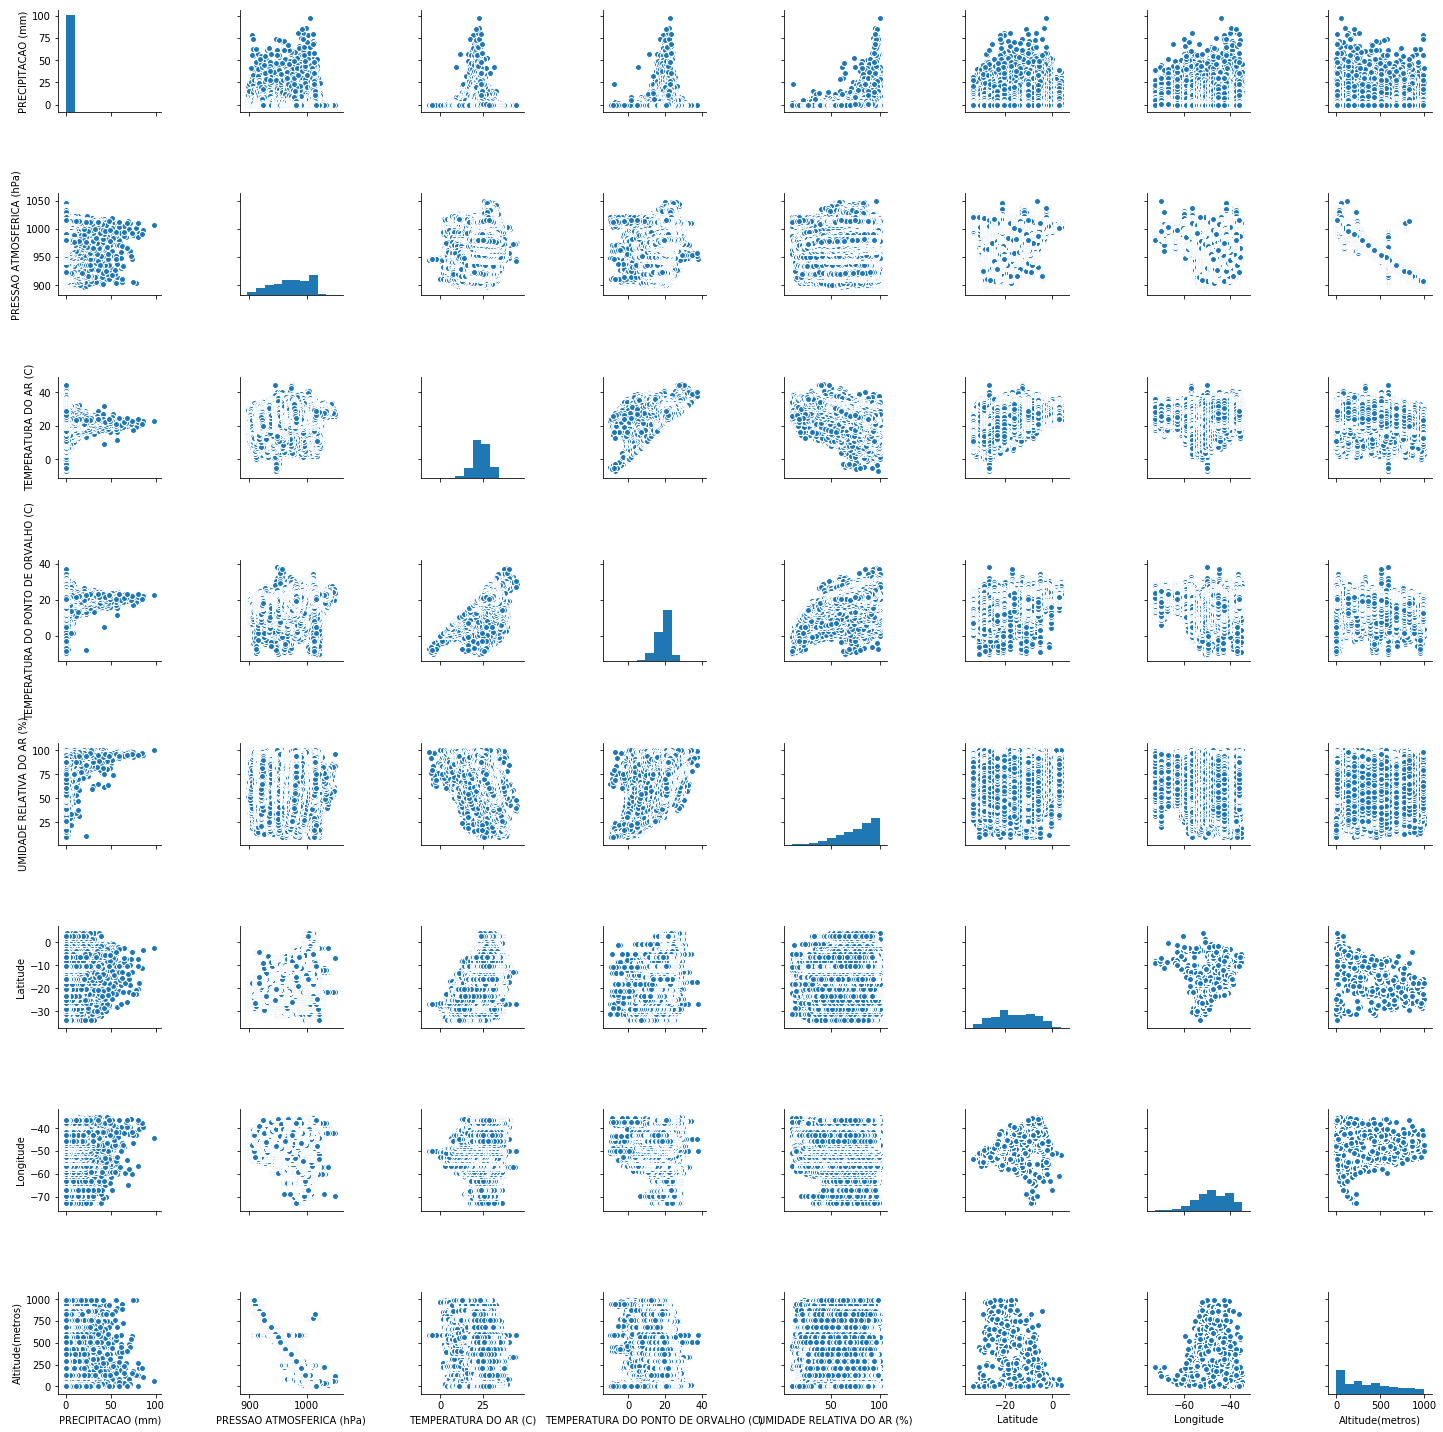

In [67]:
sns.pairplot(data[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)','TEMPERATURA DO PONTO DE ORVALHO (C)',
                   'UMIDADE RELATIVA DO AR (%)','Latitude','Longitude','Altitude(metros)']].dropna(),)

### Fazendo a base de dados com as medias mensais de cada estação

In [2]:
data_mean = data.groupby(['Nome']).agg('mean')
data_mean.to_csv('./Tempo-Clima/Dados/Brasil_'+month_num+'_mean.csv')
data_mean.head(5)

Altitude(metros)  Codigo OMM        Day     H(UTC)  \
Nome                                                                      
Abrolhos-A422                    21.0     86765.0  16.189698  11.516332   
Acaraú-A360                      67.0     81755.0  16.118370  11.531755   
Afonso Cláudio-A657             507.0     86827.0  16.574778  11.513339   
Aimorés-A534                    288.0     86803.0  15.233218  11.730332   
Alegre-A617                     129.0     86828.0  15.500000  11.500000   

                      Latitude  Longitude  Month  PRECIPITACAO (mm)  \
Nome                                                                  
Abrolhos-A422       -17.963016 -38.703288    4.0           0.098116   
Acaraú-A360          -3.121067 -40.087288    4.0           0.355338   
Afonso Cláudio-A657 -20.104194 -41.106861    4.0           0.074293   
Aimorés-A534        -19.532768 -41.090801    4.0           0.098202   
Alegre-A617         -20.750412 -41.488852    4.0           0.172528   

                     PRESSAO ATMOSFERICA (hPa)  \
Nome                                             
Abrolhos-A422                      1012.373084   
Acaraú-A360                        1003.647826   
Afonso Cláudio-A657                 956.891512   
Aimorés-A534                        986.454461   
Alegre-A617                         999.629611   

                     PRESSAO ATMOSFÉRICA MAXIMA (hPa)     ...       \
Nome                                                      ...        
Abrolhos-A422                             1012.600942     ...        
Acaraú-A360                               1003.922627     ...        
Afonso Cláudio-A657                        957.125627     ...        
Aimorés-A534                               986.711265     ...        
Alegre-A617                                999.885514     ...        

                     TEMPERATURA DO AR (C)  \
Nome                                         
Abrolhos-A422                    26.827293   
Acaraú-A360                      26.021898   
Afonso Cláudio-A657              22.761601   
Aimorés-A534                     25.100957   
Alegre-A617                      24.298889   

                     TEMPERATURA DO PONTO DE ORVALHO (C)  \
Nome                                                       
Abrolhos-A422                                  21.893970   
Acaraú-A360                                    23.329661   
Afonso Cláudio-A657                            17.157033   
Aimorés-A534                                   19.149546   
Alegre-A617                                    19.450944   

                     TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
Nome                                                                  
Abrolhos-A422                     27.204114               26.471231   
Acaraú-A360                       26.548805               25.511405   
Afonso Cláudio-A657               23.624616               22.000081   
Aimorés-A534                      25.781940               24.487531   
Alegre-A617                       24.918597               23.730097   

                     TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
Nome                                                              
Abrolhos-A422                                         22.353361   
Acaraú-A360                                           23.762918   
Afonso Cláudio-A657                                   17.800930   
Aimorés-A534                                          19.699505   
Alegre-A617                                           19.975694   

                     TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  \
Nome                                                              
Abrolhos-A422                                         21.444441   
Acaraú-A360                                           22.924812   
Afonso Cláudio-A657                                   16.569321   
Aimorés-A534                                          18.633201   
Alegre-A617                              

In [3]:
data_mean['Precipitação Acum.(mm)'] = data.groupby(['Nome','Year']).agg('sum').groupby('Nome').agg('mean')['PRECIPITACAO (mm)']

data_mean.to_csv('./Tempo-Clima/Dados/Brasil_4_mean.csv')

In [4]:
data_mean.describe().T

count          mean          std  \
Altitude(metros)                            461.0    364.586033   282.651302   
Codigo OMM                                  461.0  85210.475054  2320.705839   
Day                                         461.0     15.552991     0.394948   
H(UTC)                                      461.0     11.560754     0.159746   
Latitude                                    461.0    -15.353329     8.254668   
Longitude                                   461.0    -48.016664     7.239974   
Month                                       461.0      4.000000     0.000000   
PRECIPITACAO (mm)                           461.0      0.180172     0.113583   
PRESSAO ATMOSFERICA (hPa)                   461.0    971.925316    30.858510   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            461.0    971.922557    31.032397   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            461.0    971.367312    30.998016   
TEMPERATURA DO AR (C)                       461.0     24.077803     2.649264   
TEMPERATURA DO PONTO DE ORVALHO (C)         461.0     19.243841     2.859326   
TEMPERATURA MAXIMA (C)                      461.0     24.694886     2.639405   
TEMPERATURA MINIMA (C)                      461.0     23.490361     2.666834   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  461.0     19.767051     2.837434   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  461.0     18.749133     2.884324   
UMIDADE RELATIVA DO AR (%)                  461.0     76.831500     6.154003   
UMIDADE RELATIVA DO MAXIMA AR (%)           461.0     79.595018     5.910778   
UMIDADE RELATIVA DO MINIMA AR (%)           461.0     73.988940     6.365415   
Year                                        461.0   2011.868626     1.395384   
Precipitação Acum.(mm)                      461.0    121.650493    81.281428   

                                                     min           25%  \
Altitude(metros)                                1.161000    107.000000   
Codigo OMM                                  81609.000000  81951.000000   
Day                                            12.750503     15.446159   
H(UTC)                                         10.000000     11.500000   
Latitude                                      -33.742297    -21.855567   
Longitude                                     -72.786778    -52.931912   
Month                                           4.000000      4.000000   
PRECIPITACAO (mm)                               0.000000      0.107191   
PRESSAO ATMOSFERICA (hPa)                     904.032124    950.418699   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              890.033333    950.584625   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              889.483333    950.091417   
TEMPERATURA DO AR (C)                          15.702839     22.460176   
TEMPERATURA DO PONTO DE ORVALHO (C)            12.055318     17.074630   
TEMPERATURA MAXIMA (C)                         16.367431     23.079318   
TEMPERATURA MINIMA (C)                         15.091834     21.867006   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     12.636496     17.600775   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)     11.500875     16.569321   
UMIDADE RELATIVA DO AR (%)                     52.154167     72.993886   
UMIDADE RELATIVA DO MAXIMA AR (%)              54.640278     76.185482   
UMIDADE RELATIVA DO MINIMA AR (%)              49.688889     69.850034   
Year                                         2003.000000   2011.428571   
Precipitação Acum.(mm)                          0.000000     71.200000   

                                                     50%           75%  \
Altitude(metros)                              313.000000    552.000000   
Codigo OMM                                  86709.000000  86854.000000   
Day                                            15.500000     15.641237   
H(UTC)                                         11.513161     11.579529   
Latitude                                      -15.280215     -8.509552   
Longitude                                     -48.201231

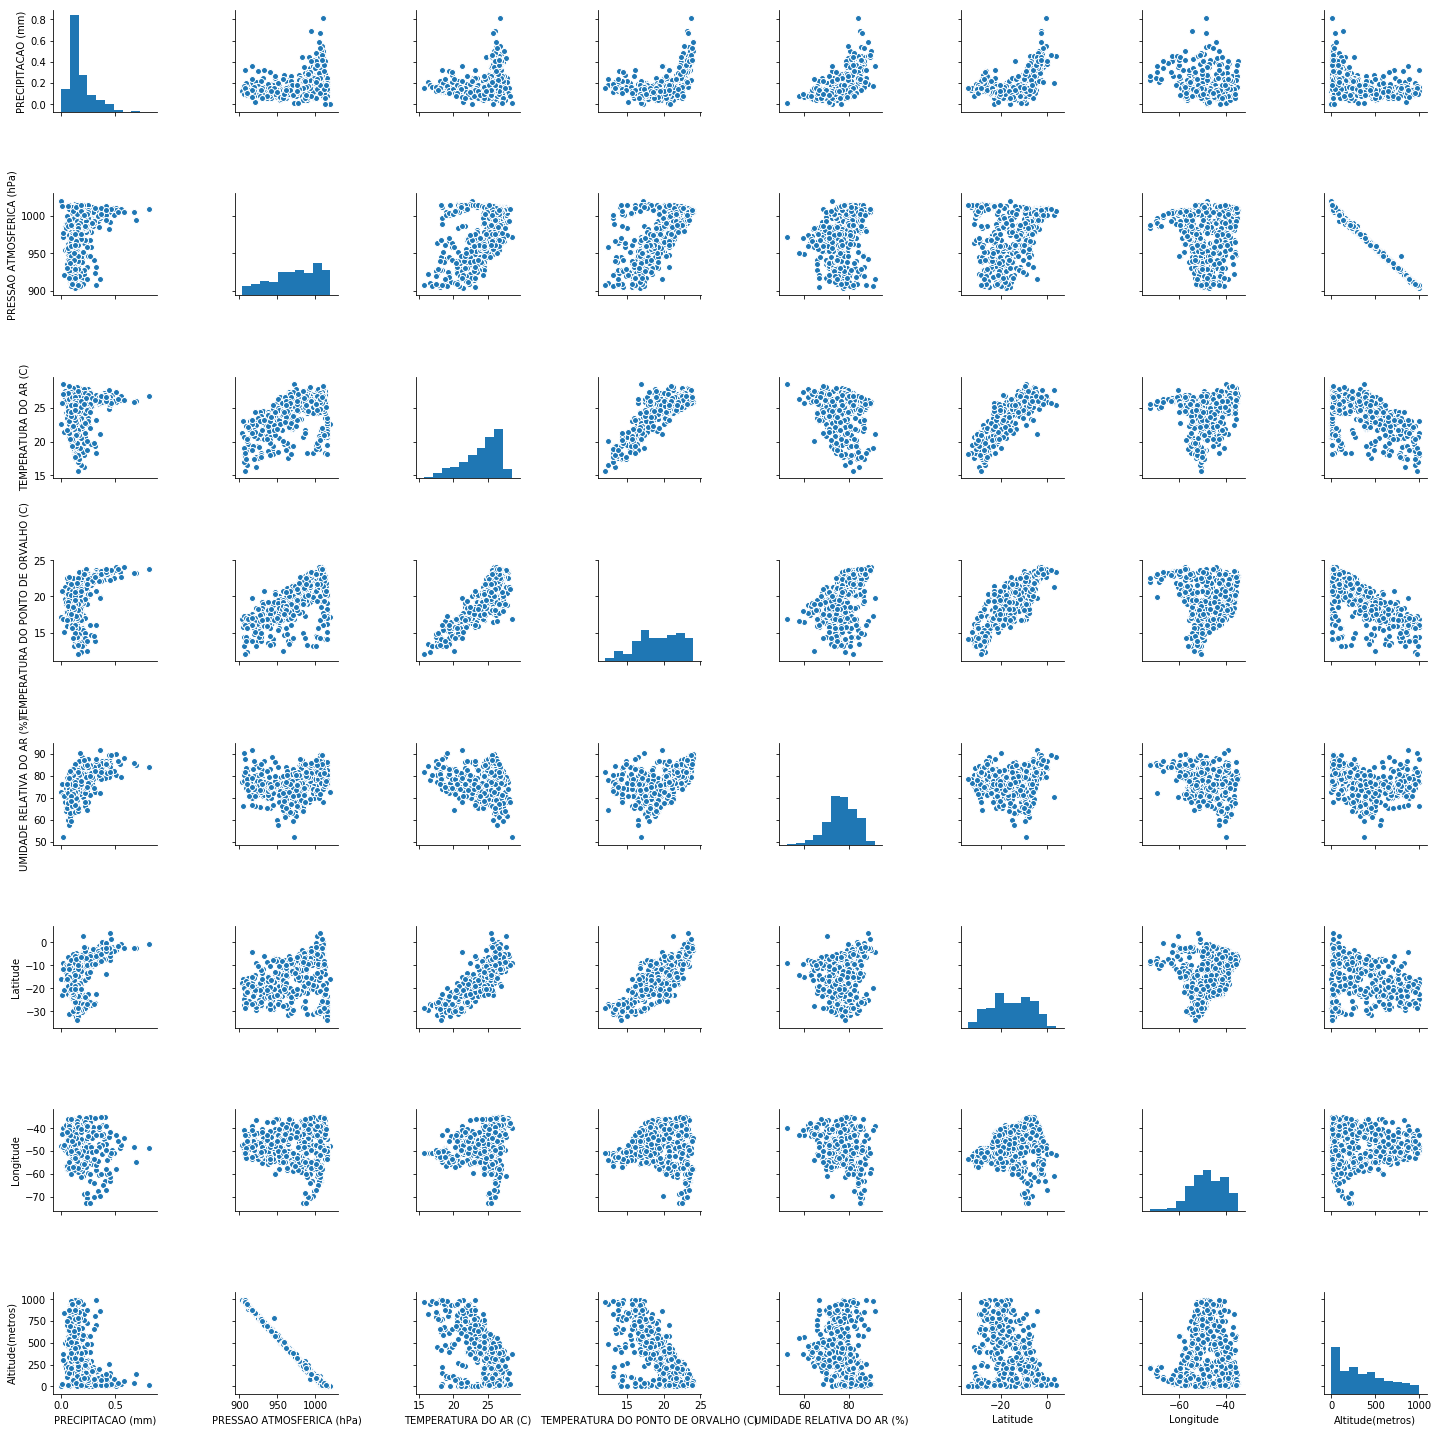

In [75]:
sns.pairplot(data_mean[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)',
                  'TEMPERATURA DO PONTO DE ORVALHO (C)','UMIDADE RELATIVA DO AR (%)','Latitude',
                  'Longitude','Altitude(metros)']])

In [76]:
target_wanderlay = ['UMIDADE RELATIVA DO AR (%)']
features_UR_wanderlay = data_mean.columns.tolist()
features_UR_wanderlay.remove('Day')
features_UR_wanderlay.remove('Month')
features_UR_wanderlay.remove('Codigo OMM')
features_UR_wanderlay.remove('Year')
features_UR_wanderlay.remove('H(UTC)')
#features_UR_wanderlay.remove('VENTO VELOCIDADE ')
#features_UR_wanderlay.remove('VENTO, DIRECAO (graus)')
#features_UR_wanderlay.remove('VENTO, RAJADA MAXIMA (m/s)')
features_UR_wanderlay.remove('UMIDADE RELATIVA DO AR (%)')
features_UR_wanderlay.remove('UMIDADE RELATIVA DO MINIMA AR (%)')
features_UR_wanderlay.remove('UMIDADE RELATIVA DO MAXIMA AR (%)')
features_UR_wanderlay.remove('TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)')
features_UR_wanderlay.remove('TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)')
features_UR_wanderlay.remove('TEMPERATURA DO PONTO DE ORVALHO (C)')
features_UR_wanderlay.remove('TEMPERATURA DO AR (C)')
#features_UR_wanderlay.remove('TEMPERATURA MAXIMA (C)')
#features_UR_wanderlay.remove('TEMPERATURA MINIMA (C)')
features_UR_wanderlay.remove('PRECIPITACAO (mm)')
features_UR_wanderlay.remove('PRESSAO ATMOSFERICA (hPa)')
features_UR_wanderlay.remove('PRESSAO ATMOSFÉRICA MAXIMA (hPa)')
features_UR_wanderlay.remove('PRESSAO ATMOSFÉRICA MINIMA (hPa)')




features_UR_wanderlay

['Altitude(metros)',
 'Latitude',
 'Longitude',
 'TEMPERATURA MAXIMA (C)',
 'TEMPERATURA MINIMA (C)']

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_mean[features_UR_wanderlay], data_mean[target_wanderlay],test_size=.25)

In [78]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler(feature_range=(-0.8,0.8))
scaler_y = MinMaxScaler(feature_range=(-0.8,0.8))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

In [79]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='adam', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)


In [80]:
import sklearn.metrics as metrics
print('Variance: {}'.format(metrics.explained_variance_score(scaler_y.inverse_transform(y_test).ravel(),scaler_y.inverse_transform([y_pred,]).ravel())))
print('Erro absoluto medio: {}'.format(metrics.mean_absolute_error(scaler_y.inverse_transform(y_test).ravel(),scaler_y.inverse_transform([y_pred,]).ravel())))
print('Erro quadrado medio: {}'.format(metrics.mean_squared_error(scaler_y.inverse_transform(y_test).ravel(),scaler_y.inverse_transform([y_pred,]).ravel())))
print('Erro absoluto mediano: {}'.format(metrics.median_absolute_error(scaler_y.inverse_transform(y_test).ravel(),scaler_y.inverse_transform([y_pred,]).ravel())))
print('R2 Score: {}'.format(metrics.r2_score(scaler_y.inverse_transform(y_test).ravel(),scaler_y.inverse_transform([y_pred,]).ravel())))

Variance: 0.8755192696138906
Erro absoluto medio: 1.9749963324269133
Erro quadrado medio: 6.186755326401849
Erro absoluto mediano: 1.7207917782689535
R2 Score: 0.8733316562922693


In [81]:
errors=abs(scaler_y.inverse_transform(y_test).ravel()-scaler_y.inverse_transform([y_pred,]))
print('Error(UR_true - UR_pred)')
print('MIN: {} \tMAX: {} \tMEAN: {}\tStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Error(UR_true - UR_pred)
MIN: 0.020478554936630644 	MAX: 7.437431249246032 	MEAN: 1.9749963324269133	Std: 1.51200026894908


In [82]:
df_rest = pd.DataFrame(data = scaler_y.inverse_transform(y_test).ravel(),columns=['Y_true'])
df_rest['Y_pred'] = scaler_y.inverse_transform(y_test).ravel()
df_rest.sort_values(['Y_pred','Y_true']).head(5)

Y_true     Y_pred
11  52.154167  52.154167
30  62.847244  62.847244
6   62.983210  62.983210
58  63.147840  63.147840
99  63.536503  63.536503

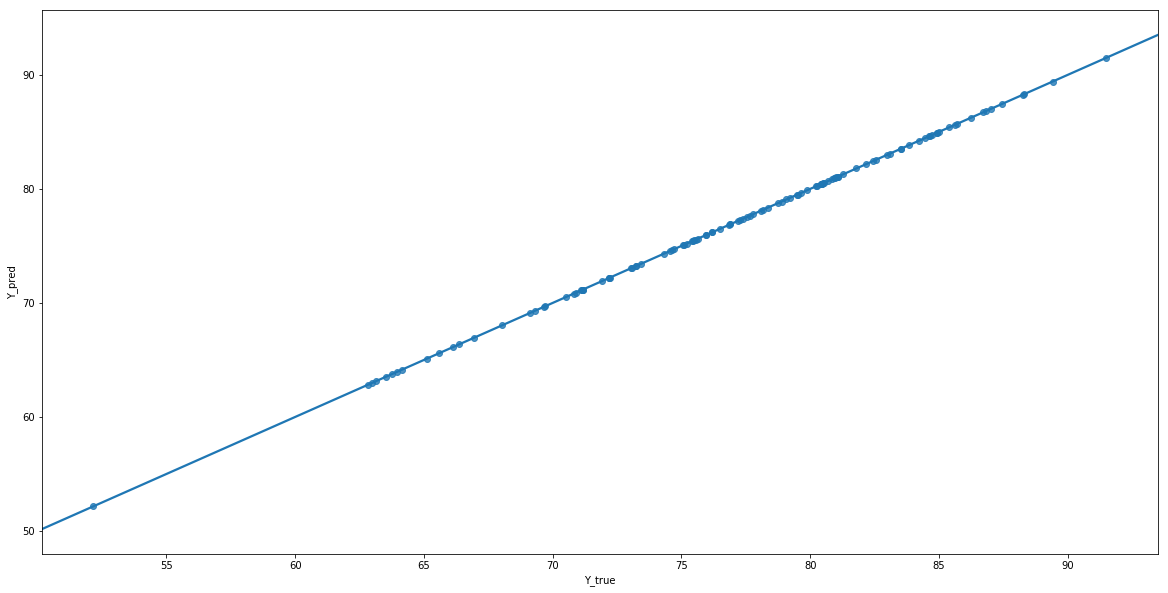

In [83]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(x="Y_true", y="Y_pred", data=df_rest,ax=ax)

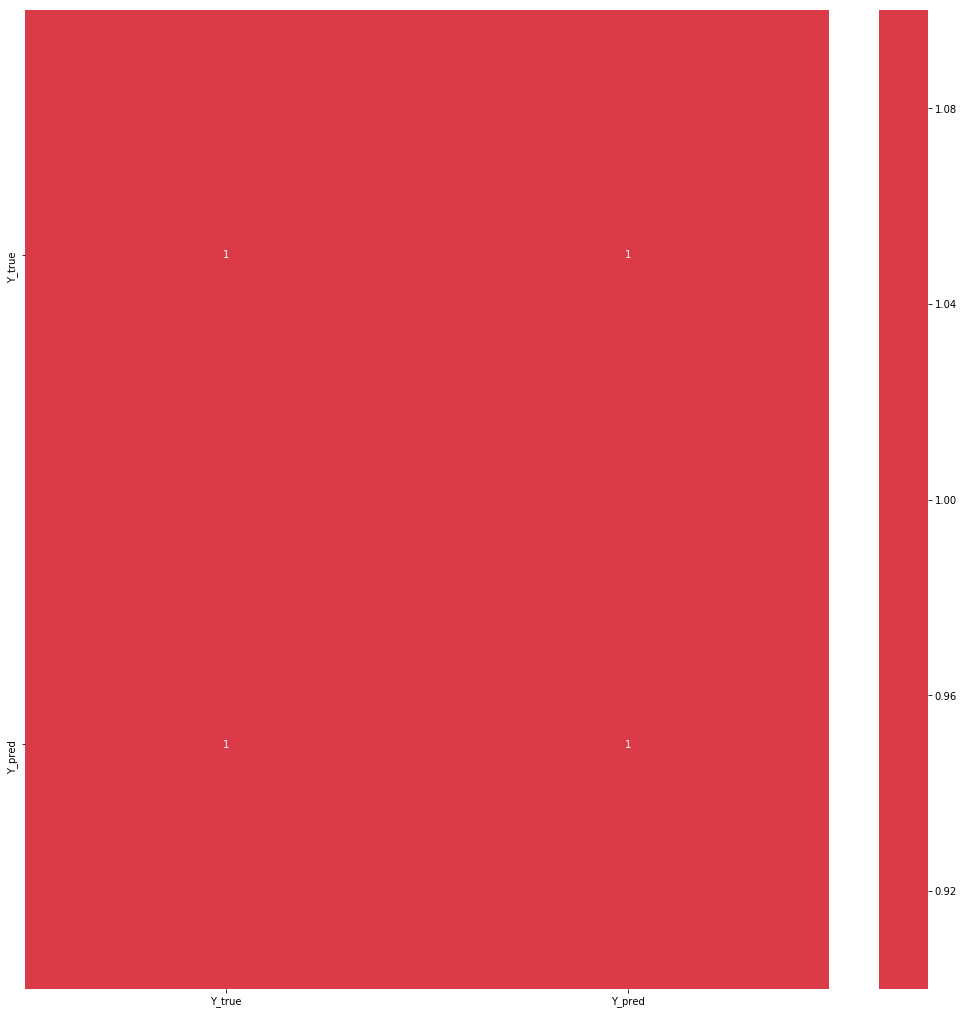

In [84]:
cor_matrix = df_rest.corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(18,18));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()